In [143]:
df=pd.read_csv('ÏõêÎ≥∏/POS00009T_20230430.csv', encoding='utf-8')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DELIV_DATE          252 non-null    int64  
 1   DELIV_PO_REGI_POCD  252 non-null    int64  
 2   DISC_NO             252 non-null    int64  
 3   DELIV_AREA_NO       252 non-null    int64  
 4   MAIL_KIND_SP_CD     252 non-null    int64  
 5   MAIL_SP_CD          252 non-null    int64  
 6   SPCL_TRT_CD         210 non-null    float64
 7   DOM_EM_YN           210 non-null    object 
 8   RCV_PO_REGI_POCD    210 non-null    float64
 9   VST_PRCL_YN         252 non-null    object 
 10  ELECT_MAIL_YN       50 non-null     object 
 11  CNTR_REGI_YN        0 non-null      float64
 12  PRSN_APPO_YN        169 non-null    object 
 13  CONG_MAIL_SP_CD     0 non-null      float64
 14  MAIL_WGHT           0 non-null      float64
 15  MAIL_VOLM           170 non-null    float64
 16  RCV_DATE

DELIV_DATE              0
DELIV_PO_REGI_POCD      0
DISC_NO                 0
DELIV_AREA_NO           0
MAIL_KIND_SP_CD         0
MAIL_SP_CD              0
SPCL_TRT_CD            42
DOM_EM_YN              42
RCV_PO_REGI_POCD       42
VST_PRCL_YN             0
ELECT_MAIL_YN         202
CNTR_REGI_YN          252
PRSN_APPO_YN           83
CONG_MAIL_SP_CD       252
MAIL_WGHT             252
MAIL_VOLM              82
RCV_DATE               43
SEMI_REGI_YN            2
BLD_MNGM_NO            46
DELIV_CTPV_NM          46
DELIV_CTGG_NM          46
DELIV_ADSTRD_NM        46
EUPD_IVNM              43
dtype: int64

In [144]:
df = df.dropna(subset=['RCV_DATE', 'DELIV_DATE', 'DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'])

In [145]:
df.isnull().sum()

DELIV_DATE              0
DELIV_PO_REGI_POCD      0
DISC_NO                 0
DELIV_AREA_NO           0
MAIL_KIND_SP_CD         0
MAIL_SP_CD              0
SPCL_TRT_CD             0
DOM_EM_YN               0
RCV_PO_REGI_POCD        0
VST_PRCL_YN             0
ELECT_MAIL_YN         158
CNTR_REGI_YN          205
PRSN_APPO_YN           40
CONG_MAIL_SP_CD       205
MAIL_WGHT             205
MAIL_VOLM              38
RCV_DATE                0
SEMI_REGI_YN            1
BLD_MNGM_NO             0
DELIV_CTPV_NM           0
DELIV_CTGG_NM           0
DELIV_ADSTRD_NM         0
EUPD_IVNM               0
dtype: int64

In [146]:
df.to_csv('20230430_Ï†ïÏ†ú.csv', index=False, encoding='utf-8-sig')

In [151]:
rcv_raw = df["RCV_DATE"].astype(str).str.strip()
print("\nüîç RCV_DATE ÏõêÏãú Í∞í ÏÉòÌîå:")
print(rcv_raw.unique()[:20])


üîç RCV_DATE ÏõêÏãú Í∞í ÏÉòÌîå:
['20230428.0' '20230427.0' '20230421.0']


In [152]:
# üìÇ CSV Î≥ëÌï© ÎåÄÏÉÅ Ìè¥Îçî
cleaned_folder = "."  # or "cleaned_data"
merged_df = pd.DataFrame()

# üìÑ CSV ÌååÏùº Î™©Î°ù
file_list = [f for f in os.listdir(cleaned_folder) if f.endswith(".csv")]

# üìé CSV Î≥ëÌï©
for file_name in file_list:
    file_path = os.path.join(cleaned_folder, file_name)
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        merged_df = pd.concat([merged_df, df], ignore_index=True)
        print(f"üìé Î≥ëÌï© ÏôÑÎ£å: {file_name} (ÎàÑÏ†Å Ìñâ Ïàò: {len(merged_df)})")
    except Exception as e:
        print(f"‚ö†Ô∏è Î≥ëÌï© Ïã§Ìå®: {file_name} / Ïò§Î•ò: {e}")

# ‚úÖ ÎÇ†Ïßú Ï≤òÎ¶¨ Ìï®Ïàò
def clean_date_column(series):
    raw = series.astype(str).str.strip()
    raw = raw.str.split(".").str[0]  # üîπ '20230428.0' ‚Üí '20230428'
    raw = raw.str.replace(r"[^0-9]", "", regex=True)
    valid_mask = raw.str.len() == 8
    result = pd.NaT
    result_series = pd.Series([pd.NaT] * len(raw))
    result_series.loc[valid_mask] = pd.to_datetime(raw[valid_mask], format='%Y%m%d', errors='coerce')
    return result_series

# ‚úÖ ÎÇ†Ïßú Î≥ÄÌôò Ï†ÅÏö©
merged_df["RCV_DATE"] = clean_date_column(merged_df["RCV_DATE"])
merged_df["DELIV_DATE"] = clean_date_column(merged_df["DELIV_DATE"])

# ‚úÖ Î≥ÄÌôò Í≤∞Í≥º ÌôïÏù∏
print("\nüóìÔ∏è ÎÇ†Ïßú Î≥ÄÌôò Í≤∞Í≥º:")
print("RCV_DATE null Ïàò:", merged_df["RCV_DATE"].isna().sum())
print("DELIV_DATE null Ïàò:", merged_df["DELIV_DATE"].isna().sum())

print("\n‚úÖ ÏµúÏ¢Ö Î≥ëÌï© Î∞è ÎÇ†Ïßú Ï≤òÎ¶¨ ÏôÑÎ£å!")
print(merged_df.info())

C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


üìé Î≥ëÌï© ÏôÑÎ£å: 20230401_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 580003)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230402_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 587400)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230403_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 2011019)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230404_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 4407104)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230405_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 6589844)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230406_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 9206893)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230407_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 12116319)


C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


üìé Î≥ëÌï© ÏôÑÎ£å: 20230408_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 12746719)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230409_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 12746733)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230410_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 15200991)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230411_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 18128583)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230412_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 20455782)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230413_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 22884735)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230414_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 25399589)


C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


üìé Î≥ëÌï© ÏôÑÎ£å: 20230415_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 26011236)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230416_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 26011322)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230417_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 28160764)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230418_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 31001128)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230419_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 33290732)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230420_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 35514005)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230421_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 37622191)


C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


üìé Î≥ëÌï© ÏôÑÎ£å: 20230422_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 38210138)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230423_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 38210288)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230424_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 39702724)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230425_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 42115369)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230426_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 44151856)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230427_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 46268534)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230428_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 48322982)


C:\Users\hdemn\AppData\Local\Temp\ipykernel_144424\3742190353.py:12: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8-sig')


üìé Î≥ëÌï© ÏôÑÎ£å: 20230429_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 48946195)
üìé Î≥ëÌï© ÏôÑÎ£å: 20230430_Ï†ïÏ†ú.csv (ÎàÑÏ†Å Ìñâ Ïàò: 48946400)

üóìÔ∏è ÎÇ†Ïßú Î≥ÄÌôò Í≤∞Í≥º:
RCV_DATE null Ïàò: 0
DELIV_DATE null Ïàò: 0

‚úÖ ÏµúÏ¢Ö Î≥ëÌï© Î∞è ÎÇ†Ïßú Ï≤òÎ¶¨ ÏôÑÎ£å!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48946400 entries, 0 to 48946399
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   DELIV_DATE          datetime64[ns]
 1   DELIV_PO_REGI_POCD  int64         
 2   DISC_NO             int64         
 3   DELIV_AREA_NO       int64         
 4   MAIL_KIND_SP_CD     int64         
 5   MAIL_SP_CD          int64         
 6   SPCL_TRT_CD         float64       
 7   DOM_EM_YN           object        
 8   RCV_PO_REGI_POCD    float64       
 9   VST_PRCL_YN         object        
 10  ELECT_MAIL_YN       object        
 11  CNTR_REGI_YN        object        
 12  PRSN_APPO_YN        object        
 13  CONG_MAIL_SP_CD     float6

In [155]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48946400 entries, 0 to 48946399
Data columns (total 23 columns):
 #   Column              Dtype         
---  ------              -----         
 0   DELIV_DATE          datetime64[ns]
 1   DELIV_PO_REGI_POCD  int64         
 2   DISC_NO             int64         
 3   DELIV_AREA_NO       int64         
 4   MAIL_KIND_SP_CD     int64         
 5   MAIL_SP_CD          int64         
 6   SPCL_TRT_CD         float64       
 7   DOM_EM_YN           object        
 8   RCV_PO_REGI_POCD    float64       
 9   VST_PRCL_YN         object        
 10  ELECT_MAIL_YN       object        
 11  CNTR_REGI_YN        object        
 12  PRSN_APPO_YN        object        
 13  CONG_MAIL_SP_CD     float64       
 14  MAIL_WGHT           float64       
 15  MAIL_VOLM           float64       
 16  RCV_DATE            datetime64[ns]
 17  SEMI_REGI_YN        object        
 18  BLD_MNGM_NO         object        
 19  DELIV_CTPV_NM       object        
 20  

In [156]:
merged_df.head()

DELIV_DATE  DELIV_PO_REGI_POCD        DISC_NO  DELIV_AREA_NO  \
0 2023-04-01               40086  6064895955535          43501   
1 2023-04-01               40086  6865289638668          43501   
2 2023-04-01               40086  6892037503973          43501   
3 2023-04-01               40086  6064889866430          43501   
4 2023-04-01               40086  6096359238210          43501   

   MAIL_KIND_SP_CD  MAIL_SP_CD  SPCL_TRT_CD DOM_EM_YN  RCV_PO_REGI_POCD  \
0                1           2          1.0         N           10248.0   
1                1           2          1.0         N           35656.0   
2                1           2          1.0         N           14559.0   
3                1           2          1.0         N           10248.0   
4                1           2          1.0         N           40308.0   

  VST_PRCL_YN  ... CONG_MAIL_SP_CD MAIL_WGHT MAIL_VOLM   RCV_DATE  \
0           Y  ...             NaN       NaN       NaN 2023-03-31   
1           Y  ...             NaN       NaN      50.0 2023-03-31   
2           N  ...             NaN       NaN      80.0 2023-03-31   
3           Y  ...             NaN       NaN       NaN 2023-03-31   
4           Y  ...             NaN       NaN      50.0 2023-03-31   

   SEMI_REGI_YN                BLD_MNGM_NO DELIV_CTPV_NM DELIV_CTGG_NM  \
0             N  4127310100105860000037211           Í≤ΩÍ∏∞ÎèÑ       ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨   
1             N  4127310100105860000037209           Í≤ΩÍ∏∞ÎèÑ       ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨   
2             N  4127310100105860000037210           Í≤ΩÍ∏∞ÎèÑ       ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨   
3             N  4127310100105860000037210           Í≤ΩÍ∏∞ÎèÑ       ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨   
4             N  4127310100105860000037213           Í≤ΩÍ∏∞ÎèÑ       ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨   

  DELIV_ADSTRD_NM         EUPD_IVNM  
0             Í≥†ÏûîÎèô      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Ï§ëÍµ¨ Ïö¥ÏÑúÎèô  
1             Í≥†ÏûîÎèô  Ï∂©Ï≤≠ÎÇ®ÎèÑ Ï≤úÏïàÏãú ÎèôÎÇ®Íµ¨ Ï≤≠ÎãπÎèô  
2             Í≥†ÏûîÎèô    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÏÑúÍµ¨ ÌôîÍ≥°1Îèô  
3             Í≥†ÏûîÎèô      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Ï§ëÍµ¨ Ïö¥ÏÑúÎèô  
4             Í≥†ÏûîÎèô       Í≤ΩÍ∏∞ÎèÑ ÌèâÌÉùÏãú ÎπÑÏ†ÑÎèô  

[5 rows x 23 columns]

In [163]:
merged_df.to_csv("merged_with_dates.csv", index=False, encoding="utf-8-sig")
print("üíæ Ï†ÄÏû• ÏôÑÎ£å: merged_with_dates.csv")

üíæ Ï†ÄÏû• ÏôÑÎ£å: merged_with_dates.csv


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DELIV_DATE          7398 non-null   datetime64[ns]
 1   DELIV_PO_REGI_POCD  7398 non-null   int64         
 2   DISC_NO             7398 non-null   int64         
 3   DELIV_AREA_NO       7398 non-null   int64         
 4   RCV_DATE            7398 non-null   datetime64[ns]
 5   DELIV_CTPV_NM       7397 non-null   object        
 6   DELIV_CTGG_NM       7397 non-null   object        
 7   DELIV_ADSTRD_NM     7397 non-null   object        
 8   EUPD_IVNM           7398 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 520.3+ KB


In [13]:
print(merged_df.isnull().sum())

DELIV_DATE            0
DELIV_PO_REGI_POCD    0
DISC_NO               0
DELIV_AREA_NO         0
RCV_DATE              0
DELIV_CTPV_NM         1
DELIV_CTGG_NM         1
DELIV_ADSTRD_NM       1
EUPD_IVNM             0
dtype: int64


In [14]:
merged_df = merged_df.dropna()

In [15]:
print(merged_df.isnull().sum())

DELIV_DATE            0
DELIV_PO_REGI_POCD    0
DISC_NO               0
DELIV_AREA_NO         0
RCV_DATE              0
DELIV_CTPV_NM         0
DELIV_CTGG_NM         0
DELIV_ADSTRD_NM       0
EUPD_IVNM             0
dtype: int64


In [32]:
negatives = merged_df[merged_df['RCV_DATE'] < merged_df['DELIV_DATE']]
print(f"‚ùó Ï∂úÎ∞úÏùºÎ≥¥Îã§ ÎèÑÏ∞©ÏùºÏù¥ Îçî Îπ†Î•∏ Í±¥Ïàò: {len(negatives)}")
print(negatives[['DELIV_DATE', 'RCV_DATE']].head())

‚ùó Ï∂úÎ∞úÏùºÎ≥¥Îã§ ÎèÑÏ∞©ÏùºÏù¥ Îçî Îπ†Î•∏ Í±¥Ïàò: 7397
  DELIV_DATE   RCV_DATE
0 2023-04-02 2023-04-01
1 2023-04-02 2023-04-01
2 2023-04-02 2023-04-01
3 2023-04-02 2023-04-01
4 2023-04-02 2023-04-01


In [21]:
merged_df.head()

DELIV_DATE  DELIV_PO_REGI_POCD        DISC_NO  DELIV_AREA_NO   RCV_DATE  \
0 2023-04-02               56057  1068818433597          82016 2023-04-01   
1 2023-04-02               60382  1068818429163          11022 2023-04-01   
2 2023-04-02               60382  1068818434701          11022 2023-04-01   
3 2023-04-02               60382  1068818434204          11022 2023-04-01   
4 2023-04-02               60382  1068818434770          11022 2023-04-01   

  DELIV_CTPV_NM DELIV_CTGG_NM DELIV_ADSTRD_NM           EUPD_IVNM  Î∞∞ÏÜ°ÏÜåÏöîÏùº  
0          Ï†ÑÎùºÎ∂ÅÎèÑ           Íµ∞ÏÇ∞Ïãú             Ìù•ÎÇ®Îèô  Ï†ÑÎùºÎ∂ÅÎèÑ Ï†ÑÏ£ºÏãú ÏôÑÏÇ∞Íµ¨ Ìö®ÏûêÎèô2Í∞Ä      1  
1         Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú            ÎèôÍµ¨            ÎÇ®Î™©1Îèô        Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú Ï§ëÍµ¨ ÌïôÏÑ±Îèô      1  
2         Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú            ÎèôÍµ¨            ÎÇ®Î™©1Îèô        Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú Ï§ëÍµ¨ ÌïôÏÑ±Îèô      1  
3         Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú            ÎèôÍµ¨            ÎÇ®Î™©1Îèô        Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú Ï§ëÍµ¨ ÌïôÏÑ±Îèô      1  
4         Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú            ÎèôÍµ¨            ÎÇ®Î™©1Îèô        Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú Ï§ëÍµ¨ ÌïôÏÑ±Îèô      1

In [162]:
# üîÑ Íµ¨ Ìè¨Ìï®Ìï¥ÏÑú Í∑∏Î£πÌôî
route_counts = merged_df.groupby(['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']).size().reset_index(name='Í±¥Ïàò')

# üîü ÏÉÅÏúÑ 10Í∞ú Î£®Ìä∏
top_routes = route_counts.sort_values(by='Í±¥Ïàò', ascending=False).head(10)

top_routes['Ï∂úÎ∞úÏßÄ'] = top_routes['DELIV_CTPV_NM'] + " " + top_routes['DELIV_CTGG_NM']
top_routes['Î∞∞ÏÜ°Î£®Ìä∏'] = top_routes['Ï∂úÎ∞úÏßÄ'] + " ‚Üí " + top_routes['EUPD_IVNM']

In [159]:
# üîπ 4. Î∞∞ÏÜ° ÏÜåÏöî ÏùºÏàò Í≥ÑÏÇ∞
merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# üîπ 5. Ï†ÑÍµ≠ ÌèâÍ∑† Î∞∞ÏÜ° ÏÜåÏöîÏùºÏàò Í≥ÑÏÇ∞
avg_days = merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'].mean()
print(f"‚úÖ Ï†ÑÍµ≠ ÌèâÍ∑† Î∞∞ÏÜ° ÏÜåÏöîÏùº: {avg_days:.4f}Ïùº")

# üîπ 6. Ï∂úÎ∞úÏßÄ-ÎèÑÏ∞©ÏßÄ Ï°∞Ìï©Î≥Ñ Í±¥Ïàò ÏßëÍ≥Ñ
route_counts = merged_df.groupby(['DELIV_CTGG_NM', 'EUPD_IVNM']).size().reset_index(name='Í±¥Ïàò')

# üîπ 7. TOP 10 Î£®Ìä∏ Ï∂îÏ∂ú
top_routes = route_counts.sort_values(by='Í±¥Ïàò', ascending=False).head(10)

‚úÖ Ï†ÑÍµ≠ ÌèâÍ∑† Î∞∞ÏÜ° ÏÜåÏöîÏùº: 2.4080Ïùº


In [165]:
# # üìä ÏãúÍ∞ÅÌôî
# plt.figure(figsize=(10, 6))
# sns.barplot(data=top_routes, x='Í±¥Ïàò', y='Î∞∞ÏÜ°Î£®Ìä∏')
# plt.title("üì¶ Í∞ÄÏû• ÎßéÏù¥ Î∞úÏÉùÌïú Î∞∞ÏÜ° Î£®Ìä∏ TOP 10")
# plt.xlabel("Î∞∞ÏÜ° Í±¥Ïàò")
# plt.ylabel("Î∞∞ÏÜ° Î£®Ìä∏")
# plt.tight_layout()
# plt.show()

In [2]:
import pandas as pd
merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')
merged_df

C:\Users\hdemn\AppData\Local\Temp\ipykernel_153688\1838646914.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')


DELIV_DATE  DELIV_PO_REGI_POCD        DISC_NO  DELIV_AREA_NO  \
0         2023-04-01               40086  6064895955535          43501   
1         2023-04-01               40086  6865289638668          43501   
2         2023-04-01               40086  6892037503973          43501   
3         2023-04-01               40086  6064889866430          43501   
4         2023-04-01               40086  6096359238210          43501   
...              ...                 ...            ...            ...   
48946395  2023-04-30               41627  6861500034808          43006   
48946396  2023-04-30               41627  7854151289393          43006   
48946397  2023-04-30               41627  7493702010161          43006   
48946398  2023-04-30               15181  6141202185453          43907   
48946399  2023-04-30               41627  7333501004797          43006   

          MAIL_KIND_SP_CD  MAIL_SP_CD  SPCL_TRT_CD DOM_EM_YN  \
0                       1           2          1.0         N   
1                       1           2          1.0         N   
2                       1           2          1.0         N   
3                       1           2          1.0         N   
4                       1           2          1.0         N   
...                   ...         ...          ...       ...   
48946395                1           2          1.0         N   
48946396                1           2          1.0         N   
48946397                1           2          1.0         N   
48946398                1           2          1.0         N   
48946399                1           2          1.0         N   

          RCV_PO_REGI_POCD VST_PRCL_YN  ... MAIL_WGHT MAIL_VOLM    RCV_DATE  \
0                  10248.0           Y  ...       NaN       NaN  2023-03-31   
1                  35656.0           Y  ...       NaN      50.0  2023-03-31   
2                  14559.0           N  ...       NaN      80.0  2023-03-31   
3                  10248.0           Y  ...       NaN       NaN  2023-03-31   
4                  40308.0           Y  ...       NaN      50.0  2023-03-31   
...                    ...         ...  ...       ...       ...         ...   
48946395           10186.0           Y  ...       NaN      50.0  2023-04-28   
48946396           41627.0           Y  ...       NaN      60.0  2023-04-21   
48946397           49374.0           N  ...       NaN      70.0  2023-04-28   
48946398           14120.0           N  ...       NaN      50.0  2023-04-28   
48946399           33358.0           N  ...       NaN      80.0  2023-04-28   

          SEMI_REGI_YN                BLD_MNGM_NO  DELIV_CTPV_NM  \
0                    N  4127310100105860000037211            Í≤ΩÍ∏∞ÎèÑ   
1                    N  4127310100105860000037209            Í≤ΩÍ∏∞ÎèÑ   
2                    N  4127310100105860000037210            Í≤ΩÍ∏∞ÎèÑ   
3                    N  4127310100105860000037210            Í≤ΩÍ∏∞ÎèÑ   
4                    N  4127310100105860000037213            Í≤ΩÍ∏∞ÎèÑ   
...                ...                        ...            ...   
48946395             N  4159025328102200001033788            Í≤ΩÍ∏∞ÎèÑ   
48946396             N  4122025624103400032000001            Í≤ΩÍ∏∞ÎèÑ   
48946397             N  4159025320200080001028607            Í≤ΩÍ∏∞ÎèÑ   
48946398             N  1130510100101340094019141          ÏÑúÏö∏ÌäπÎ≥ÑÏãú   
48946399             N  4159025324105050014028587            Í≤ΩÍ∏∞ÎèÑ   

         DELIV_CTGG_NM DELIV_ADSTRD_NM         EUPD_IVNM Î∞∞ÏÜ°ÏÜåÏöîÏùº  
0              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Ï§ëÍµ¨ Ïö¥ÏÑúÎèô     1  
1              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô  Ï∂©Ï≤≠ÎÇ®ÎèÑ Ï≤úÏïàÏãú ÎèôÎÇ®Íµ¨ Ï≤≠ÎãπÎèô     1  
2              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÏÑúÍµ¨ ÌôîÍ≥°1Îèô     1  
3              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Ï§ëÍµ¨ Ïö¥ÏÑúÎèô     1  
4              ÏïàÏÇ∞Ïãú Îã

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48946400 entries, 0 to 48946399
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   DELIV_DATE          object 
 1   DELIV_PO_REGI_POCD  int64  
 2   DISC_NO             int64  
 3   DELIV_AREA_NO       int64  
 4   MAIL_KIND_SP_CD     int64  
 5   MAIL_SP_CD          int64  
 6   SPCL_TRT_CD         float64
 7   DOM_EM_YN           object 
 8   RCV_PO_REGI_POCD    float64
 9   VST_PRCL_YN         object 
 10  ELECT_MAIL_YN       object 
 11  CNTR_REGI_YN        object 
 12  PRSN_APPO_YN        object 
 13  CONG_MAIL_SP_CD     float64
 14  MAIL_WGHT           float64
 15  MAIL_VOLM           float64
 16  RCV_DATE            object 
 17  SEMI_REGI_YN        object 
 18  BLD_MNGM_NO         object 
 19  DELIV_CTPV_NM       object 
 20  DELIV_CTGG_NM       object 
 21  DELIV_ADSTRD_NM     object 
 22  EUPD_IVNM           object 
 23  Î∞∞ÏÜ°ÏÜåÏöîÏùº               int64  
dtypes: float64(5

In [5]:
merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ‚úÖ ÌôïÏù∏
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48946400 entries, 0 to 48946399
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   DELIV_DATE          datetime64[ns]
 1   DELIV_PO_REGI_POCD  int64         
 2   DISC_NO             int64         
 3   DELIV_AREA_NO       int64         
 4   MAIL_KIND_SP_CD     int64         
 5   MAIL_SP_CD          int64         
 6   SPCL_TRT_CD         float64       
 7   DOM_EM_YN           object        
 8   RCV_PO_REGI_POCD    float64       
 9   VST_PRCL_YN         object        
 10  ELECT_MAIL_YN       object        
 11  CNTR_REGI_YN        object        
 12  PRSN_APPO_YN        object        
 13  CONG_MAIL_SP_CD     float64       
 14  MAIL_WGHT           float64       
 15  MAIL_VOLM           float64       
 16  RCV_DATE            datetime64[ns]
 17  SEMI_REGI_YN        object        
 18  BLD_MNGM_NO         object        
 19  DELIV_CTPV_NM       object        
 20  

## Ïô∏Î∂ÄÎç∞Ïù¥ÌÑ∞Î°ú Îã®Ïàú ÏòàÏ∏°Í∏∞ Ìï®Ïàò ÎßåÎì§Í∏∞

In [4]:
import pandas as pd
merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')
merged_df

C:\Users\hdemn\AppData\Local\Temp\ipykernel_186112\1838646914.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')


DELIV_DATE  DELIV_PO_REGI_POCD        DISC_NO  DELIV_AREA_NO  \
0         2023-04-01               40086  6064895955535          43501   
1         2023-04-01               40086  6865289638668          43501   
2         2023-04-01               40086  6892037503973          43501   
3         2023-04-01               40086  6064889866430          43501   
4         2023-04-01               40086  6096359238210          43501   
...              ...                 ...            ...            ...   
48946395  2023-04-30               41627  6861500034808          43006   
48946396  2023-04-30               41627  7854151289393          43006   
48946397  2023-04-30               41627  7493702010161          43006   
48946398  2023-04-30               15181  6141202185453          43907   
48946399  2023-04-30               41627  7333501004797          43006   

          MAIL_KIND_SP_CD  MAIL_SP_CD  SPCL_TRT_CD DOM_EM_YN  \
0                       1           2          1.0         N   
1                       1           2          1.0         N   
2                       1           2          1.0         N   
3                       1           2          1.0         N   
4                       1           2          1.0         N   
...                   ...         ...          ...       ...   
48946395                1           2          1.0         N   
48946396                1           2          1.0         N   
48946397                1           2          1.0         N   
48946398                1           2          1.0         N   
48946399                1           2          1.0         N   

          RCV_PO_REGI_POCD VST_PRCL_YN  ... MAIL_WGHT MAIL_VOLM    RCV_DATE  \
0                  10248.0           Y  ...       NaN       NaN  2023-03-31   
1                  35656.0           Y  ...       NaN      50.0  2023-03-31   
2                  14559.0           N  ...       NaN      80.0  2023-03-31   
3                  10248.0           Y  ...       NaN       NaN  2023-03-31   
4                  40308.0           Y  ...       NaN      50.0  2023-03-31   
...                    ...         ...  ...       ...       ...         ...   
48946395           10186.0           Y  ...       NaN      50.0  2023-04-28   
48946396           41627.0           Y  ...       NaN      60.0  2023-04-21   
48946397           49374.0           N  ...       NaN      70.0  2023-04-28   
48946398           14120.0           N  ...       NaN      50.0  2023-04-28   
48946399           33358.0           N  ...       NaN      80.0  2023-04-28   

          SEMI_REGI_YN                BLD_MNGM_NO  DELIV_CTPV_NM  \
0                    N  4127310100105860000037211            Í≤ΩÍ∏∞ÎèÑ   
1                    N  4127310100105860000037209            Í≤ΩÍ∏∞ÎèÑ   
2                    N  4127310100105860000037210            Í≤ΩÍ∏∞ÎèÑ   
3                    N  4127310100105860000037210            Í≤ΩÍ∏∞ÎèÑ   
4                    N  4127310100105860000037213            Í≤ΩÍ∏∞ÎèÑ   
...                ...                        ...            ...   
48946395             N  4159025328102200001033788            Í≤ΩÍ∏∞ÎèÑ   
48946396             N  4122025624103400032000001            Í≤ΩÍ∏∞ÎèÑ   
48946397             N  4159025320200080001028607            Í≤ΩÍ∏∞ÎèÑ   
48946398             N  1130510100101340094019141          ÏÑúÏö∏ÌäπÎ≥ÑÏãú   
48946399             N  4159025324105050014028587            Í≤ΩÍ∏∞ÎèÑ   

         DELIV_CTGG_NM DELIV_ADSTRD_NM         EUPD_IVNM Î∞∞ÏÜ°ÏÜåÏöîÏùº  
0              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Ï§ëÍµ¨ Ïö¥ÏÑúÎèô     1  
1              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô  Ï∂©Ï≤≠ÎÇ®ÎèÑ Ï≤úÏïàÏãú ÎèôÎÇ®Íµ¨ Ï≤≠ÎãπÎèô     1  
2              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÏÑúÍµ¨ ÌôîÍ≥°1Îèô     1  
3              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Ï§ëÍµ¨ Ïö¥ÏÑúÎèô     1  
4              ÏïàÏÇ∞Ïãú Îã

In [5]:
merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ‚úÖ ÌôïÏù∏
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object


In [6]:
merged_df.describe()

DELIV_DATE  DELIV_PO_REGI_POCD       DISC_NO  \
count                       48946400        4.894640e+07  4.894640e+07   
mean   2023-04-15 03:43:26.351040256        3.937026e+04  3.681630e+12   
min              2023-04-01 00:00:00        1.001500e+04  1.000000e+12   
25%              2023-04-08 00:00:00        2.014600e+04  1.105804e+12   
50%              2023-04-14 00:00:00        4.017500e+04  2.583201e+12   
75%              2023-04-21 00:00:00        5.604800e+04  6.096360e+12   
max              2023-04-30 00:00:00        8.609100e+04  8.740070e+12   
std                              NaN        1.959110e+04  2.460757e+12   

       DELIV_AREA_NO  MAIL_KIND_SP_CD    MAIL_SP_CD   SPCL_TRT_CD  \
count   4.894640e+07     4.894640e+07  4.894640e+07  4.563773e+07   
mean    2.435491e+04     1.597996e+00  1.402004e+00  3.000966e+00   
min     1.000000e+01     1.000000e+00  1.000000e+00  1.000000e+00   
25%     1.105400e+04     1.000000e+00  1.000000e+00  1.000000e+00   
50%     1.160400e+04     2.000000e+00  1.000000e+00  1.000000e+00   
75%     4.300800e+04     2.000000e+00  2.000000e+00  1.000000e+00   
max     8.299900e+04     2.000000e+00  2.000000e+00  5.400000e+01   
std     1.913880e+04     4.903027e-01  4.903027e-01  6.713932e+00   

       RCV_PO_REGI_POCD  CONG_MAIL_SP_CD  MAIL_WGHT     MAIL_VOLM  \
count      4.894640e+07           4034.0        0.0  1.733259e+07   
mean       3.479477e+04              1.0        NaN  6.856978e+01   
min        1.001500e+04              1.0        NaN  1.000000e+00   
25%        1.025700e+04              1.0        NaN  5.000000e+01   
50%        4.016600e+04              1.0        NaN  6.000000e+01   
75%        4.583000e+04              1.0        NaN  8.000000e+01   
max        7.551600e+04              1.0        NaN  2.700000e+02   
std        1.988786e+04              0.0        NaN  2.133882e+01   

                            RCV_DATE         Î∞∞ÏÜ°ÏÜåÏöîÏùº  
count                       48946400  4.894640e+07  
mean   2023-04-12 17:55:53.606850560  2.408018e+00  
min              2020-07-16 00:00:00  0.000000e+00  
25%              2023-04-06 00:00:00  1.000000e+00  
50%              2023-04-12 00:00:00  2.000000e+00  
75%              2023-04-19 00:00:00  3.000000e+00  
max              2023-04-28 00:00:00  1.016000e+03  
std                              NaN  2.547646e+00

In [20]:
# 1. Î∞∞ÏÜ°ÏÜåÏöîÏùº Í≥ÑÏÇ∞ ÏôÑÎ£åÎêú merged_df Í∏∞Ï§Ä
merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# 2. Ï∂úÎ∞úÏßÄ-ÎèÑÏ∞©ÏßÄ Ï°∞Ìï©Î≥Ñ ÌèâÍ∑† ÏÜåÏöîÏùº Í≥ÑÏÇ∞
route_avg_days = (
    merged_df
    .groupby(['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'])['Î∞∞ÏÜ°ÏÜåÏöîÏùº']
    .mean()
    .reset_index(name='ÌèâÍ∑†ÏÜåÏöîÏùº')
)

def ÏòàÏÉÅ_Î∞∞ÏÜ°ÏùºÏûê_ÏòàÏ∏°(deliv_ctpv, deliv_ctgg, eupd_ivnm, Î∞úÏÜ°Ïùº):
    Î∞úÏÜ°Ïùº = pd.to_datetime(Î∞úÏÜ°Ïùº)

    row = route_avg_days[
        (route_avg_days['DELIV_CTPV_NM'] == deliv_ctpv) &
        (route_avg_days['DELIV_CTGG_NM'] == deliv_ctgg) &
        (route_avg_days['EUPD_IVNM'] == eupd_ivnm)
    ]
    
    if not row.empty:
        days = row['ÌèâÍ∑†ÏÜåÏöîÏùº'].values[0]
    else:
        days = merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'].mean()

    ÏòàÏ∏°Ïùº = Î∞úÏÜ°Ïùº + pd.Timedelta(days=days)
    return ÏòàÏ∏°Ïùº

# 4. ÏòàÏãú ÏÇ¨Ïö©
ÏòàÏÉÅÏùºÏûê = ÏòàÏÉÅ_Î∞∞ÏÜ°ÏùºÏûê_ÏòàÏ∏°("ÏÑúÏö∏ÌäπÎ≥ÑÏãú", "Í∞ïÎÇ®Íµ¨", "Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Ìï¥Ïö¥ÎåÄÍµ¨", "2025-06-23")
print(f"üì¶ ÏòàÏÉÅ ÎèÑÏ∞©Ïùº: {ÏòàÏÉÅÏùºÏûê.date()}")

üì¶ ÏòàÏÉÅ ÎèÑÏ∞©Ïùº: 2025-06-25


In [22]:
# 1. Ïã§Ï†ú Î∞∞ÏÜ°ÏÜåÏöîÏùº Í≥ÑÏÇ∞
merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# 2. Ï∂úÎ∞úÏßÄ-ÎèÑÏ∞©ÏßÄ ÌèâÍ∑† ÏÜåÏöîÏùº ÌÖåÏù¥Î∏î ÏÉùÏÑ±
route_avg_days = (
    merged_df
    .groupby(['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'])['Î∞∞ÏÜ°ÏÜåÏöîÏùº']
    .mean()
    .reset_index(name='ÌèâÍ∑†ÏÜåÏöîÏùº')
)

# 3. ÏòàÏ∏° Ìï®Ïàò Ï†ïÏùò
def ÏòàÏÉÅ_Î∞∞ÏÜ°ÏùºÏûê_ÏòàÏ∏°(deliv_ctpv, deliv_ctgg, eupd_ivnm, Î∞úÏÜ°Ïùº):
    Î∞úÏÜ°Ïùº = pd.to_datetime(Î∞úÏÜ°Ïùº)
    row = route_avg_days[
        (route_avg_days['DELIV_CTPV_NM'] == deliv_ctpv) &
        (route_avg_days['DELIV_CTGG_NM'] == deliv_ctgg) &
        (route_avg_days['EUPD_IVNM'] == eupd_ivnm)
    ]
    
    if not row.empty:
        days = row['ÌèâÍ∑†ÏÜåÏöîÏùº'].values[0]
    else:
        days = merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'].mean()

    return Î∞úÏÜ°Ïùº + pd.Timedelta(days=days)

# 1. ÎûúÎç§ ÏÉòÌîå 1000Í∞ú Ï∂îÏ∂ú (ÏãúÎìú Í≥†Ï†ï)
sample_df = merged_df.sample(n=1000, random_state=42).copy()

# 2. ÏòàÏÉÅ Î∞∞ÏÜ°ÏôÑÎ£åÏùº Í≥ÑÏÇ∞
sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = sample_df.apply(
    lambda row: ÏòàÏÉÅ_Î∞∞ÏÜ°ÏùºÏûê_ÏòàÏ∏°(
        row['DELIV_CTPV_NM'],
        row['DELIV_CTGG_NM'],
        row['EUPD_IVNM'],
        row['RCV_DATE']
    ), axis=1
)

# 3. ÏòàÏÉÅ Î∞∞ÏÜ°ÏÜåÏöîÏùº Í≥ÑÏÇ∞
sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - sample_df['RCV_DATE']).dt.days

In [23]:
sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº']

15453888    1
40990724    3
47691680    2
23146285    1
20020085    3
           ..
38297160    3
26738637    2
40453464    2
19864524    1
24230713    3
Name: ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº, Length: 1000, dtype: int64

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 4. ÏÑ±Îä• ÌèâÍ∞Ä
mae = mean_absolute_error(sample_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'], sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'])
rmse = np.sqrt(mean_squared_error(sample_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'], sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº']))

print("üìä ÏòàÏ∏° ÏÑ±Îä• (ÏÉòÌîå 1000Í∞ú Í∏∞Ï§Ä)")
print(f"MAE : {mae:.2f}Ïùº")
print(f"RMSE: {rmse:.2f}Ïùº")

üìä ÏòàÏ∏° ÏÑ±Îä• (ÏÉòÌîå 1000Í∞ú Í∏∞Ï§Ä)
MAE : 1.11Ïùº
RMSE: 2.00Ïùº


## Ïù¥ ÏòàÏ∏° Ìï®ÏàòÎ°ú Ïö∞Î¶¨ Î∞∞ÏÜ°Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©

In [13]:
import pandas as pd
df=pd.read_csv('Î∞∞ÏÜ°.csv', encoding='utf-8-sig')

C:\Users\hdemn\AppData\Local\Temp\ipykernel_203772\500001413.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Î∞∞ÏÜ°.csv', encoding='utf-8-sig')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199582 entries, 0 to 199581
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ï£ºÎ¨∏Î≤àÌò∏    199582 non-null  object 
 1   Î∞∞ÏÜ°ÏôÑÎ£åÏùº   199582 non-null  object 
 2   Î∞∞ÏÜ°ÏãúÏûëÏùº   199582 non-null  object 
 3   Íµ¨Îß§Ïùº     199582 non-null  object 
 4   Íµ¨Îß§ÏãúÏõîÎ†π   167839 non-null  float64
 5   Í≥†Í∞ùÎ≤àÌò∏    199582 non-null  float64
 6   Íµ¨Îß§Í∏àÏï°    199582 non-null  int64  
 7   Í≤∞Ï†úÍ∏àÏï°    199582 non-null  int64  
 8   Î¨ºÌíàÎåÄÎ∂ÑÎ•ò   199582 non-null  object 
 9   ÏÉÅÌíàÎ™Ö     199582 non-null  object 
 10  ÏÑ±Î≥Ñ      199582 non-null  object 
 11  Í≤∞ÌòºÏú†Î¨¥    199582 non-null  object 
 12  Í±∞Ï£ºÏßÄÏó≠    199582 non-null  object 
 13  Ïó∞Î†π      199582 non-null  int64  
 14  Í≤∞Ï†úÎì±Î°ùÏπ¥Îìú  199582 non-null  object 
 15  Ïú†ÏûÖÍ≤ΩÎ°ú    199582 non-null  object 
 16  ÏûêÎÖÄÏó¨Î∂Ä    199582 non-null  object 
 17  Ï∂úÏÇ∞ÏòàÏ†ï    199582 non

In [36]:
# Ïª¨Îüº ÌÉÄÏûÖ ÌôïÏù∏
print(sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'].dtype) 

datetime64[ns]


In [38]:
# 2. ÎÇ†Ïßú Î≥ÄÌôò
df['Î∞∞ÏÜ°ÏãúÏûëÏùº'] = pd.to_datetime(df['Î∞∞ÏÜ°ÏãúÏûëÏùº'])

# 3. Ï∂úÎ∞úÏßÄ (Í≥†Ï†ïÍ∞í)
Ï∂úÎ∞ú_ÏãúÎèÑ = 'Í≤ΩÍ∏∞ÎèÑ'
Ï∂úÎ∞ú_ÏãúÍµ∞Íµ¨ = 'ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨'

# 1. ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï (Ïû¨ÌòÑ Í∞ÄÎä•ÏÑ± ÏúÑÌï¥ ÏÑ†ÌÉù ÏÇ¨Ìï≠)
np.random.seed(42)

# 2. ÎûúÎç§ ÏÉòÌîå 100Í∞ú Ï∂îÏ∂ú
sample_df = df.sample(n=100).copy()

# 3. apply ÏòàÏ∏° Ï†ÅÏö©
sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = sample_df.apply(
    lambda row: ÏòàÏÉÅ_Î∞∞ÏÜ°ÏùºÏûê_ÏòàÏ∏°(
        deliv_ctpv=Ï∂úÎ∞ú_ÏãúÎèÑ,
        deliv_ctgg=Ï∂úÎ∞ú_ÏãúÍµ∞Íµ¨,
        eupd_ivnm=row['Í±∞Ï£ºÏßÄÏó≠'],
        Î∞úÏÜ°Ïùº=row['Î∞∞ÏÜ°ÏãúÏûëÏùº']
    ),
    axis=1
)

# 4. Í≤∞Í≥º Ï∂úÎ†•
print(sample_df[['Î∞∞ÏÜ°ÏãúÏûëÏùº', 'Í±∞Ï£ºÏßÄÏó≠', 'ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].sort_values(by='ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'))

            Î∞∞ÏÜ°ÏãúÏûëÏùº Í±∞Ï£ºÏßÄÏó≠                      ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº
13864  2022-03-12   Í≤ΩÍ∏∞ 2022-03-13 09:55:48.125994731
15760  2022-03-17  Í≤ΩÏÉÅÎèÑ 2022-03-19 10:02:29.894593469
17995  2022-03-24   Î∂ÄÏÇ∞ 2022-03-25 11:15:50.614946314
19489  2022-03-29   Í≤ΩÍ∏∞ 2022-04-01 07:35:22.129416070
21884  2022-04-03  Ï∂©Ï≤≠ÎèÑ 2022-04-05 05:46:44.847959090
...           ...  ...                           ...
192713 2023-07-09   ÏÑúÏö∏ 2023-07-11 17:20:38.779837528
194514 2023-07-20  Ï∂©Ï≤≠ÎèÑ 2023-07-23 00:11:50.699003537
194625 2023-07-21  Ï∂©Ï≤≠ÎèÑ 2023-07-24 02:49:30.854039205
196056 2023-07-27   Í∞ïÏõê 2023-07-28 22:50:50.153497958
199503 2023-08-09   Í∞ïÏõê 2023-08-12 05:26:15.170612111

[100 rows x 3 columns]


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# ÏÉòÌîå Ï∂îÏ∂ú (Î∞∞ÏÜ°ÏôÑÎ£åÏùº Ìè¨Ìï®!)
sample_df = df[['Î∞∞ÏÜ°ÏãúÏûëÏùº', 'Î∞∞ÏÜ°ÏôÑÎ£åÏùº', 'Í±∞Ï£ºÏßÄÏó≠']].sample(n=100, random_state=42).copy()

# ÎÇ†ÏßúÌòï Î≥ÄÌôò
sample_df['Î∞∞ÏÜ°ÏãúÏûëÏùº'] = pd.to_datetime(sample_df['Î∞∞ÏÜ°ÏãúÏûëÏùº'])
sample_df['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = pd.to_datetime(sample_df['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'])

# ÏòàÏ∏° ÏàòÌñâ
sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = sample_df.apply(
    lambda row: ÏòàÏÉÅ_Î∞∞ÏÜ°ÏùºÏûê_ÏòàÏ∏°(
        deliv_ctpv='Í≤ΩÍ∏∞ÎèÑ',
        deliv_ctgg='ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨',
        eupd_ivnm=row['Í±∞Ï£ºÏßÄÏó≠'],
        Î∞úÏÜ°Ïùº=row['Î∞∞ÏÜ°ÏãúÏûëÏùº']
    ),
    axis=1
)

# ÏÜåÏöîÏùº Í≥ÑÏÇ∞
sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - sample_df['Î∞∞ÏÜ°ÏãúÏûëÏùº']).dt.days
sample_df['Ïã§Ï†ú_Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (sample_df['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] - sample_df['Î∞∞ÏÜ°ÏãúÏûëÏùº']).dt.days

# ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
mae = mean_absolute_error(sample_df['Ïã§Ï†ú_Î∞∞ÏÜ°ÏÜåÏöîÏùº'], sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'])
rmse = np.sqrt(mean_squared_error(sample_df['Ïã§Ï†ú_Î∞∞ÏÜ°ÏÜåÏöîÏùº'], sample_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº']))

# Í≤∞Í≥º Ï∂úÎ†•
print("üìä ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º (ÏÉòÌîå 100Í∞ú Í∏∞Ï§Ä)")
print(f"MAE  (ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®): {mae:.2f}Ïùº")
print(f"RMSE (ÌèâÍ∑† Ï†úÍ≥±Í∑º Ïò§Ï∞®): {rmse:.2f}Ïùº")

üìä ÏÑ±Îä• ÌèâÍ∞Ä Í≤∞Í≥º (ÏÉòÌîå 100Í∞ú Í∏∞Ï§Ä)
MAE  (ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®): 1.04Ïùº
RMSE (ÌèâÍ∑† Ï†úÍ≥±Í∑º Ïò§Ï∞®): 1.37Ïùº


## lightgbm + ÏàòÎèô autoML Í∏∞Î∞ò Î∞∞ÏÜ° ÏùºÏûê ÏòàÏ∏°Í∏∞

In [16]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1Ô∏è‚É£ ÎÇ†ÏßúÌòï Î≥ÄÌôò
# merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
# merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# 2Ô∏è‚É£ ÎÇ†Ïßú ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±
merged_df['deliv_year'] = merged_df['DELIV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['DELIV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['DELIV_DATE'].dt.dayofweek

# 3Ô∏è‚É£ ÏßÄÏó≠ Ïù∏ÏΩîÎî©
le_ctpv = LabelEncoder().fit(merged_df['DELIV_CTPV_NM'])
le_ctgg = LabelEncoder().fit(merged_df['DELIV_CTGG_NM'])
le_dest = LabelEncoder().fit(merged_df['EUPD_IVNM'].astype(str))

merged_df['o_ctpv'] = le_ctpv.transform(merged_df['DELIV_CTPV_NM'])
merged_df['o_ctgg'] = le_ctgg.transform(merged_df['DELIV_CTGG_NM'])
merged_df['dest'] = le_dest.transform(merged_df['EUPD_IVNM'].astype(str))

# 4Ô∏è‚É£ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
features = ['o_ctpv', 'o_ctgg', 'dest', 'deliv_year', 'deliv_month', 'deliv_dayofweek']
X = merged_df[features]
y = merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, y_train)
val_data = lgb.Dataset(X_val, y_val, reference=train_data)

params = {
    'objective': 'regression',
    'metric': ['l1', 'l2'],
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1,
    'seed': 42
}

# 5Ô∏è‚É£ Î™®Îç∏ ÌïôÏäµ (verbose_eval ÏóÜÏù¥)
model = lgb.train(params, train_data, num_boost_round=300, valid_sets=[val_data])

# 6Ô∏è‚É£ ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = model.predict(X_val)
print("MAE:", mean_absolute_error(y_val, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))

# 7Ô∏è‚É£ ÏòàÏ∏° Ìï®Ïàò Ï†ïÏùò
def Î∞∞ÏÜ°ÏòàÏ∏°_Î™®Îç∏(deliv_ctpv, deliv_ctgg, eupd_ivnm, Î∞úÏÜ°Ïùº):
    Î∞úÏÜ°Ïùº = pd.to_datetime(Î∞úÏÜ°Ïùº)

    # ÏïàÏ†ÑÌïòÍ≤å Î≥ÄÌôò (ÏóÜÎäî Í∞íÏùÄ -1Î°ú Ï≤òÎ¶¨)
    def safe_transform(le, value):
        if value in le.classes_:
            return le.transform([value])[0]
        else:
            return -1

    Ï∂úÎ∞ú_ÏãúÎèÑ = safe_transform(le_ctpv, deliv_ctpv)
    Ï∂úÎ∞ú_ÏãúÍµ∞Íµ¨ = safe_transform(le_ctgg, deliv_ctgg)
    ÎèÑÏ∞©ÏßÄ = safe_transform(le_dest, eupd_ivnm)

    year = Î∞úÏÜ°Ïùº.year
    month = Î∞úÏÜ°Ïùº.month
    dayofweek = Î∞úÏÜ°Ïùº.dayofweek

    X_new = pd.DataFrame([[Ï∂úÎ∞ú_ÏãúÎèÑ, Ï∂úÎ∞ú_ÏãúÍµ∞Íµ¨, ÎèÑÏ∞©ÏßÄ, year, month, dayofweek]], columns=features)

    ÏòàÏ∏°_ÏùºÏàò = model.predict(X_new)[0]

    if pd.isna(ÏòàÏ∏°_ÏùºÏàò):
        print("‚ùå ÏòàÏ∏°Í∞íÏù¥ NaNÏûÖÎãàÎã§.")
        return None

    return Î∞úÏÜ°Ïùº + pd.Timedelta(days=round(ÏòàÏ∏°_ÏùºÏàò))

# 8Ô∏è‚É£ ÏòàÏãú Ïã§Ìñâ
ÏòàÏÉÅÏùºÏûê = Î∞∞ÏÜ°ÏòàÏ∏°_Î™®Îç∏("ÏÑúÏö∏ÌäπÎ≥ÑÏãú", "Í∞ïÎÇ®Íµ¨", "Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Ìï¥Ïö¥ÎåÄÍµ¨", "2025-06-23")
if ÏòàÏÉÅÏùºÏûê is not None:
    print(f"üì¶ Î™®Îç∏ Í∏∞Î∞ò ÏòàÏÉÅ ÎèÑÏ∞©Ïùº: {ÏòàÏÉÅÏùºÏûê.date()}")
else:
    print("‚ö†Ô∏è ÏòàÏ∏° Ïã§Ìå®: Í≤∞Í≥ºÍ∞Ä ÏóÜÏäµÎãàÎã§.")

MAE: 1.0382979941077102
RMSE: 2.2191778644082305
üì¶ Î™®Îç∏ Í∏∞Î∞ò ÏòàÏÉÅ ÎèÑÏ∞©Ïùº: 2025-06-27


## autoML ÏòàÏ∏°Í∏∞ (pycaret) - ÌååÏù¥Ïç¨ Î≤ÑÏ†Ñ ÏßÄÏõêÎ∂àÍ∞ÄÎ°ú Ïã§Ìå®

In [17]:
pip install pycaret


INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/21.8 MB 12.2 MB/s eta 0:00:02
   ------------ --------------------------- 7.1/21.8 MB 17.4 MB/s eta 0:00:01
   ------------------------ --------------- 13.1/21.8 MB 21.6 MB/s eta 0:00:01
   -------------------------------------- - 21.0/21.8 MB 25.0 MB/s eta 0:00:01
   ---------------------------------------- 21.8/21.8 MB 24.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ------------------------------------- -- 7.1/7.5 MB 36.3 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 33.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.5 MB ? eta -:--:--
   ----------------------- ---------------- 6.3/10.5 MB 35.1 MB/s eta 0:00:01
   --------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.


In [18]:
import pandas as pd
from pycaret.regression import *

# 2Ô∏è‚É£ ÎÇ†Ïßú Î≥ÄÌôò Î∞è ÏÜåÏöîÏùº Í≥ÑÏÇ∞
# merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
# merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')
merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days

# 3Ô∏è‚É£ ÎÇ†Ïßú ÌäπÏÑ± Ï∂îÍ∞Ä
merged_df['deliv_year'] = merged_df['DELIV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['DELIV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['DELIV_DATE'].dt.dayofweek  # 0=ÏõîÏöîÏùº

# 4Ô∏è‚É£ Í≤∞Ï∏°Ïπò Ï†úÍ±∞ (ÌïÑÏàò Ïª¨Îüº Í∏∞Ï§Ä)
merged_df = merged_df.dropna(subset=['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', 'Î∞∞ÏÜ°ÏÜåÏöîÏùº'])

# 5Ô∏è‚É£ PyCaret ÏÑ§Ï†ï
setup_data = setup(
    data=merged_df,
    target='Î∞∞ÏÜ°ÏÜåÏöîÏùº',
    categorical_features=['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'],
    ignore_features=['DELIV_DATE', 'RCV_DATE'],  # ÏõêÎûò ÎÇ†ÏßúÎäî ÏÇ¨Ïö© ÏïàÌï®
    silent=True,
    session_id=42,
    verbose=False
)

# 6Ô∏è‚É£ Î™®Îç∏ ÏûêÎèô ÎπÑÍµê Î∞è ÏµúÏ†Å Î™®Îç∏ ÏÑ†ÌÉù
best_model = compare_models()

# 7Ô∏è‚É£ ÏòàÏ∏°Ïö© ÏûÖÎ†•Í∞í ÏÉùÏÑ±
new_data = pd.DataFrame({
    'DELIV_CTPV_NM': ['ÏÑúÏö∏ÌäπÎ≥ÑÏãú'],
    'DELIV_CTGG_NM': ['Í∞ïÎÇ®Íµ¨'],
    'EUPD_IVNM': ['Ìï¥Ïö¥ÎåÄÍµ¨'],
    'deliv_year': [2025],
    'deliv_month': [6],
    'deliv_dayofweek': [0]  # Ïòà: ÏõîÏöîÏùº
})

# 8Ô∏è‚É£ ÏòàÏ∏° ÏàòÌñâ
predicted_days = predict_model(best_model, data=new_data)
ÏòàÏÉÅ_ÏÜåÏöîÏùº = int(round(predicted_days['Label'][0]))

# 9Ô∏è‚É£ Î∞∞ÏÜ°Ïùº Í≥ÑÏÇ∞
Î∞úÏÜ°Ïùº = pd.Timestamp('2025-06-23')
ÏòàÏÉÅ_ÎèÑÏ∞©Ïùº = Î∞úÏÜ°Ïùº + pd.Timedelta(days=ÏòàÏÉÅ_ÏÜåÏöîÏùº)

# üîü Í≤∞Í≥º Ï∂úÎ†•
print("üì¶ ÏòàÏ∏°Îêú Î∞∞ÏÜ° ÏÜåÏöîÏùº:", ÏòàÏÉÅ_ÏÜåÏöîÏùº, "Ïùº")
print("üì¶ ÏòàÏ∏°Îêú ÎèÑÏ∞©ÏùºÏûê:", ÏòàÏÉÅ_ÎèÑÏ∞©Ïùº.date())

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

## autoML ÏãúÎèÑ (FLAML Í∏∞Î∞ò ÏòàÏ∏°Í∏∞) - import Î∂àÍ∞ÄÎä•ÏúºÎ°ú Ïù∏Ìï¥ Ïã§Ìå®

In [24]:
pip install --upgrade --force-reinstall "flaml[automl]"

  Using cached FLAML-2.3.5-py3-none-any.whl.metadata (16 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.7 MB 8.4 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/12.7 MB 12.4 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.7 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 12.7/12.7 MB 18.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.0 MB 7.4 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.0 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 21.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.7 

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.0 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.3.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.0 which is incompatible.
matplotlib 3.7.5 requires numpy<2,>=1.20, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.5.1 which is incompatible.
pycaret 3.3.2 requires numpy<1.27,>=1.21, but you have numpy 2.3.1 which is incompatible.
p

In [25]:
# Î®ºÏ†Ä ÏÑ§Ïπò
# pip install flaml

import pandas as pd
from flaml import AutoML

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨
# merged_df = pd.read_csv("merged_with_dates.csv", encoding="utf-8-sig")
# merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
# merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')
# merged_df = merged_df.dropna(subset=['DELIV_DATE', 'RCV_DATE', 'DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM'])

merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days
merged_df['deliv_year'] = merged_df['DELIV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['DELIV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['DELIV_DATE'].dt.dayofweek

X = merged_df[['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', 'deliv_year', 'deliv_month', 'deliv_dayofweek']]
y = merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº']

# 2. Î™®Îç∏ ÌïôÏäµ
automl = AutoML()
automl_settings = {
    "time_budget": 300,
    "metric": 'mae',
    "task": 'regression',
    "estimator_list": ['lgbm', 'xgboost', 'rf'],  # ÌïÑÏöîÌïú Î™®Îç∏ Ìè¨Ìï®
    "log_file_name": "flaml_delivery.log",
}

automl.fit(X_train=X, y_train=y, **automl_settings)

# ÏÑ±Îä• ÏöîÏïΩ
print(automl.best_config, automl.best_loss)

# 3. ÏòàÏ∏° Ìï®Ïàò
def flaml_ÏòàÏ∏°Í∏∞(deliv_ctpv, deliv_ctgg, eupd_ivnm, Î∞úÏÜ°Ïùº):
    row = pd.DataFrame([[deliv_ctpv, deliv_ctgg, eupd_ivnm,
                         pd.to_datetime(Î∞úÏÜ°Ïùº).year,
                         pd.to_datetime(Î∞úÏÜ°Ïùº).month,
                         pd.to_datetime(Î∞úÏÜ°Ïùº).dayofweek]],
                       columns=X.columns)
    days = automl.predict(row)[0]
    return pd.to_datetime(Î∞úÏÜ°Ïùº) + pd.Timedelta(days=round(days))

# ÌÖåÏä§Ìä∏
print("üì¶ ÏòàÏ∏°:", flaml_ÏòàÏ∏°Í∏∞("ÏÑúÏö∏ÌäπÎ≥ÑÏãú","Í∞ïÎÇ®Íµ¨","Ìï¥Ïö¥ÎåÄÍµ¨","2025-06-23").date())

ImportError: cannot import name 'AutoML' from 'flaml' (C:\Users\hdemn\anaconda3\Lib\site-packages\flaml\__init__.py)

## autoML ÏãúÎèÑ (h2o Í∏∞Î∞ò ÏòàÏ∏°Í∏∞)

In [21]:
pip install h2o

   ---------------------------------------- 0.0/265.9 MB ? eta -:--:--
    --------------------------------------- 3.7/265.9 MB 18.2 MB/s eta 0:00:15
   - -------------------------------------- 7.9/265.9 MB 20.3 MB/s eta 0:00:13
   -- ------------------------------------- 13.6/265.9 MB 24.4 MB/s eta 0:00:11
   -- ------------------------------------- 15.2/265.9 MB 18.4 MB/s eta 0:00:14
   --- ------------------------------------ 23.3/265.9 MB 22.4 MB/s eta 0:00:11
   ---- ----------------------------------- 27.3/265.9 MB 23.4 MB/s eta 0:00:11
   ---- ----------------------------------- 29.4/265.9 MB 20.2 MB/s eta 0:00:12
   ---- ----------------------------------- 30.7/265.9 MB 19.1 MB/s eta 0:00:13
   ---- ----------------------------------- 32.8/265.9 MB 17.6 MB/s eta 0:00:14
   ----- ---------------------------------- 36.7/265.9 MB 18.1 MB/s eta 0:00:13
   ----- ---------------------------------- 38.0/265.9 MB 16.5 MB/s eta 0:00:14
   ------ --------------------------------- 44.6/26

In [3]:
pip install numpy==1.26.4

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ------ --------------------------------- 2.6/15.5 MB 13.7 MB/s eta 0:00:01
   --------------------- ------------------ 8.4/15.5 MB 22.6 MB/s eta 0:00:01
   ------------------------- -------------- 10.0/15.5 MB 16.3 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 19.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.0 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.0 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.5.1 which is incompatible.
pycaret 3.3.2 requires pandas<2.2.0, but you have pandas 2.3.0 which is incompatible.
pycaret 3.3.2 requires scipy<=1.11.4,>=1.6.1, but you have scipy 1.16.0 which is incompatible.
sktime 0.26.0 requires pandas<2.2.0,>=1.1, but you have pandas 2.3.0 which is incompatible.
sktime 0.26.0 requires scikit-learn<1.5.0,>=0.24, but you have scikit-learn 1.7.0 which is incompatible.


In [2]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy          

In [5]:
pip uninstall numpy -y
pip cache purge  # pip Ï∫êÏãú ÏÇ≠Ï†ú
pip install numpy==1.26.4

SyntaxError: invalid syntax (1734202295.py, line 1)

In [ ]:
pip install --force-reinstall pandas scikit-learn xgboost

In [1]:
import pandas as pd
merged_df=pd.read_csv('merged_with_dates.csv', encoding="utf-8-sig")

C:\Users\hdemn\AppData\Local\Temp\ipykernel_163680\2138116275.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv('merged_with_dates.csv', encoding="utf-8-sig")


In [2]:
# ÏÑ§Ïπò
# pip install h2o

import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# JVM Î©îÎ™®Î¶¨ 8GBÎ°ú Ï¥àÍ∏∞Ìôî
h2o.init(max_mem_size="4G")

merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ‚úÖ ÌôïÏù∏
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

# (ÏÉòÌîå Îç∞Ïù¥ÌÑ∞Î°ú Ï§ÑÏù¥Í∏∞)
merged_sample = merged_df.sample(frac=0.1, random_state=42).copy()

# Î∞∞ÏÜ°ÏÜåÏöîÏùº Í≥ÑÏÇ∞ Î∞è ÎÇ†Ïßú ÌäπÏÑ± Ï∂îÍ∞Ä
merged_sample['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_sample['DELIV_DATE'] - merged_sample['RCV_DATE']).dt.days
merged_sample['deliv_year'] = merged_sample['DELIV_DATE'].dt.year
merged_sample['deliv_month'] = merged_sample['DELIV_DATE'].dt.month
merged_sample['deliv_dayofweek'] = merged_sample['DELIV_DATE'].dt.dayofweek

# H2OFrame ÏÉùÏÑ±
h2o_df = h2o.H2OFrame(merged_sample[['DELIV_CTPV_NM','DELIV_CTGG_NM','EUPD_IVNM',
                                     'deliv_year','deliv_month','deliv_dayofweek','Î∞∞ÏÜ°ÏÜåÏöîÏùº']])

# AutoML Ïã§Ìñâ (5Î∂Ñ Ï†úÌïú)
aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=300, sort_metric="MAE")
aml.train(x=['DELIV_CTPV_NM','DELIV_CTGG_NM','EUPD_IVNM','deliv_year','deliv_month','deliv_dayofweek'],
          y='Î∞∞ÏÜ°ÏÜåÏöîÏùº', training_frame=h2o_df)

print(aml.leaderboard.head())
aml.leader.save_mojo(path="h2o_best_model.mojo")

# ÏòàÏ∏° Ìï®Ïàò
def h2o_ÏòàÏ∏°Í∏∞(deliv_ctpv, deliv_ctgg, eupd_ivnm, Î∞úÏÜ°Ïùº):
    row = h2o.H2OFrame({
        'DELIV_CTPV_NM':[deliv_ctpv],
        'DELIV_CTGG_NM':[deliv_ctgg],
        'EUPD_IVNM':[eupd_ivnm],
        'deliv_year':[pd.to_datetime(Î∞úÏÜ°Ïùº).year],
        'deliv_month':[pd.to_datetime(Î∞úÏÜ°Ïùº).month],
        'deliv_dayofweek':[pd.to_datetime(Î∞úÏÜ°Ïùº).dayofweek],
    })
    pred = aml.predict(row).as_data_frame()['predict'][0]
    return pd.to_datetime(Î∞úÏÜ°Ïùº) + pd.Timedelta(days=round(pred))

print("üì¶ ÏòàÏ∏°:", h2o_ÏòàÏ∏°Í∏∞("ÏÑúÏö∏ÌäπÎ≥ÑÏãú","ÏÑúÏ¥àÍµ¨","Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Ìï¥Ïö¥ÎåÄÍµ¨","2023-06-23"))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 24.0.1+9-30, mixed mode, sharing)
  Starting server from C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\hdemn\AppData\Local\Temp\tmpnlre589j
  JVM stdout: C:\Users\hdemn\AppData\Local\Temp\tmpnlre589j\h2o_hdemn_started_from_python.out
  JVM stderr: C:\Users\hdemn\AppData\Local\Temp\tmpnlre589j\h2o_hdemn_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Asia/Seoul
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    2 months and 27 days
H2O_cluster_name:           H2O_from_python_hdemn_378qrq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.980 Gb
H2O_cluster_total_cores:    0
H2O_cluster_allowed_cores:  0
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.3 final
--------------------------  -----------------------------

DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object
Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
AutoML progress: |
23:10:16.803: AutoML: XGBoost is not available; skipping it.
23:10:16.888: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà
23:10:21.856: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
23:10:53.990: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
23:11:27.799: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà‚ñà
23:11:41.899: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà
23:11:53.783: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà‚ñà
23:12:0

C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'EUPD_IVNM' has levels not trained on: ["Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Ìï¥Ïö¥ÎåÄÍµ¨"]
  warnings.warn(w)
C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [5]:
# ÏòàÏ∏° Ìï®Ïàò
def h2o_ÏòàÏ∏°Í∏∞(deliv_ctpv, deliv_ctgg, eupd_ivnm, Î∞úÏÜ°Ïùº):
    row = h2o.H2OFrame({
        'DELIV_CTPV_NM':[deliv_ctpv],
        'DELIV_CTGG_NM':[deliv_ctgg],
        'EUPD_IVNM':[eupd_ivnm],
        'deliv_year':[pd.to_datetime(Î∞úÏÜ°Ïùº).year],
        'deliv_month':[pd.to_datetime(Î∞úÏÜ°Ïùº).month],
        'deliv_dayofweek':[pd.to_datetime(Î∞úÏÜ°Ïùº).dayofweek],
    })
    pred = aml.predict(row).as_data_frame()['predict'][0]
    return pd.to_datetime(Î∞úÏÜ°Ïùº) + pd.Timedelta(days=round(pred))

print("üì¶ ÏòàÏ∏°:", h2o_ÏòàÏ∏°Í∏∞("ÏÑúÏö∏ÌäπÎ≥ÑÏãú","ÏÑúÏ¥àÍµ¨","Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Ìï¥Ïö¥ÎåÄÍµ¨","2025-06-21"))

Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
gbm prediction progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
üì¶ ÏòàÏ∏°: 2025-06-22 00:00:00


C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'EUPD_IVNM' has levels not trained on: ["Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú Ìï¥Ïö¥ÎåÄÍµ¨"]
  warnings.warn(w)
C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [8]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# JVM Î©îÎ™®Î¶¨ 8GBÎ°ú Ï¥àÍ∏∞Ìôî
h2o.init(max_mem_size="4G")

merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ‚úÖ ÌôïÏù∏
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

# (ÏÉòÌîå Îç∞Ïù¥ÌÑ∞Î°ú Ï§ÑÏù¥Í∏∞)
merged_sample = merged_df.sample(frac=0.1, random_state=42).copy()

# Î∞∞ÏÜ°ÏÜåÏöîÏùº Í≥ÑÏÇ∞ Î∞è ÎÇ†Ïßú ÌäπÏÑ± Ï∂îÍ∞Ä
merged_sample['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_sample['DELIV_DATE'] - merged_sample['RCV_DATE']).dt.days
merged_sample['deliv_year'] = merged_sample['DELIV_DATE'].dt.year
merged_sample['deliv_month'] = merged_sample['DELIV_DATE'].dt.month
merged_sample['deliv_dayofweek'] = merged_sample['DELIV_DATE'].dt.dayofweek

# H2OFrame ÏÉùÏÑ±
h2o_df = h2o.H2OFrame(merged_sample[['DELIV_CTPV_NM','DELIV_CTGG_NM','EUPD_IVNM',
                                     'deliv_year','deliv_month','deliv_dayofweek','Î∞∞ÏÜ°ÏÜåÏöîÏùº']])

# 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

# 2. AutoML ÌõàÎ†®
aml = H2OAutoML(max_models=20, seed=42, max_runtime_secs=300, sort_metric="MAE")
aml.train(x=['DELIV_CTPV_NM','DELIV_CTGG_NM','EUPD_IVNM','deliv_year','deliv_month','deliv_dayofweek'],
          y='Î∞∞ÏÜ°ÏÜåÏöîÏùº', training_frame=train)

aml.leader.save_mojo(path="h2o_best_model.mojo")

# 3. ÏòàÏ∏°
preds = aml.predict(test)

# 4. ÌèâÍ∞Ä
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = test['Î∞∞ÏÜ°ÏÜåÏöîÏùº'].as_data_frame().values.flatten()
y_pred = preds.as_data_frame().values.flatten()

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"üìä MAE: {mae:.4f}")
print(f"üìä RMSE: {rmse:.4f}")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         11 mins 39 secs
H2O_cluster_timezone:       Asia/Seoul
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    2 months and 27 days
H2O_cluster_name:           H2O_from_python_hdemn_378qrq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.749 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.3 final
--------------------------  -----------------------------

DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object
Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
AutoML progress: |‚ñà
23:21:47.648: AutoML: XGBoost is not available; skipping it.
23:21:47.653: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]
23:21:50.546: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà‚ñà‚ñà
23:22:12.355: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà‚ñà‚ñà‚ñà
23:22:35.783: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà
23:22:44.971: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà
23:22:53.856: _train param, Dropping bad and constant columns: [deliv_year, deliv_month]

‚ñà‚ñà‚ñà
23:23:05.971: _train param, Dropp

C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


üìä MAE: 0.9632
üìä RMSE: 2.1716


## Í∏∞Ï°¥ Î∞∞ÏÜ° Îç∞Ïù¥ÌÑ∞ÏôÄ Ïó∞ÎèôÌï¥ÏÑú ÏòàÏ∏°Í∏∞ ÎèôÏûë

In [19]:
import pandas as pd
df=pd.read_csv('Î∞∞ÏÜ°.csv', encoding='utf-8-sig')
df.info()

C:\Users\hdemn\AppData\Local\Temp\ipykernel_176676\2128619102.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Î∞∞ÏÜ°.csv', encoding='utf-8-sig')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199582 entries, 0 to 199581
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ï£ºÎ¨∏Î≤àÌò∏    199582 non-null  object 
 1   Î∞∞ÏÜ°ÏôÑÎ£åÏùº   199582 non-null  object 
 2   Î∞∞ÏÜ°ÏãúÏûëÏùº   199582 non-null  object 
 3   Íµ¨Îß§Ïùº     199582 non-null  object 
 4   Íµ¨Îß§ÏãúÏõîÎ†π   167839 non-null  float64
 5   Í≥†Í∞ùÎ≤àÌò∏    199582 non-null  float64
 6   Íµ¨Îß§Í∏àÏï°    199582 non-null  int64  
 7   Í≤∞Ï†úÍ∏àÏï°    199582 non-null  int64  
 8   Î¨ºÌíàÎåÄÎ∂ÑÎ•ò   199582 non-null  object 
 9   ÏÉÅÌíàÎ™Ö     199582 non-null  object 
 10  ÏÑ±Î≥Ñ      199582 non-null  object 
 11  Í≤∞ÌòºÏú†Î¨¥    199582 non-null  object 
 12  Í±∞Ï£ºÏßÄÏó≠    199582 non-null  object 
 13  Ïó∞Î†π      199582 non-null  int64  
 14  Í≤∞Ï†úÎì±Î°ùÏπ¥Îìú  199582 non-null  object 
 15  Ïú†ÏûÖÍ≤ΩÎ°ú    199582 non-null  object 
 16  ÏûêÎÖÄÏó¨Î∂Ä    199582 non-null  object 
 17  Ï∂úÏÇ∞ÏòàÏ†ï    199582 non

In [20]:
# ÎÇ†Ïßú Î≥ÄÌôò
df['Î∞∞ÏÜ°ÏãúÏûëÏùº'] = pd.to_datetime(df['Î∞∞ÏÜ°ÏãúÏûëÏùº'], errors='coerce')
df['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = pd.to_datetime(df['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'], errors='coerce')

In [1]:
import os

model_path = r"C:\Users\hdemn\Desktop\h2o_best_model.mojo\GBM_1_AutoML_1_20250623_231016.zip"
print(os.path.isfile(model_path))

True


In [23]:
print(h2o_df.head())

DELIV_CTPV_NM    DELIV_CTGG_NM    EUPD_IVNM      deliv_year    deliv_month    deliv_dayofweek
ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨           ÏÑúÏö∏                 2022              1                  5
ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨           Ï∂©Ï≤≠ÎèÑ               2022              1                  6
ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨           ÏÑúÏö∏                 2022              1                  0
ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨           ÏÑúÏö∏                 2022              1                  1
ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨           Í∞ïÏõê                 2022              1                  2
ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨           Ï†úÏ£º                 2022              1                  3
ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨           Ïù∏Ï≤ú                 2022              1                  4
ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨           ÎåÄÍµ¨                 2022              1                  5
ÏÑúÏö∏ÌäπÎ≥ÑÏãú       ÏÑúÏ¥àÍµ¨           Ï∂©Ï≤≠ÎèÑ               2022   

In [22]:
import pandas as pd
import h2o

# 1. H2O Ï¥àÍ∏∞Ìôî
h2o.init(max_mem_size="4G")

# Î∞∞ÏÜ°ÏãúÏûëÏùºÏùÑ 2022ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 10Ïùº Í∞ÑÍ≤©ÏúºÎ°ú Ï¶ùÍ∞ÄÏãúÌÇ§Í∏∞ (ÏòàÏãú)
max_days = 365 * 5  # ÏµúÎåÄ 5ÎÖÑÏπò ÎÇ†ÏßúÎßå ÏÉùÏÑ± (ÏõêÌïòÎäî Î≤îÏúÑÎ°ú Ï°∞Ï†ï)

length = len(df)
days = np.arange(min(length, max_days))  # ÏµúÎåÄ max_daysÍπåÏßÄÎßå ÏÉùÏÑ±

df.loc[:len(days)-1, 'Î∞∞ÏÜ°ÏãúÏûëÏùº'] = pd.to_datetime('2022-01-01') + pd.to_timedelta(days, unit='D')

# 2. Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ (ÏÉùÎûµÎêú ÏõêÎ≥∏ Î°úÎìú, dfÎäî Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ï)
df['deliv_year'] = df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].dt.year
df['deliv_month'] = df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].dt.month
df['deliv_dayofweek'] = df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].dt.dayofweek
df['DELIV_CTPV_NM'] = 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú'
df['DELIV_CTGG_NM'] = 'ÏÑúÏ¥àÍµ¨'
df['EUPD_IVNM'] = df['Í±∞Ï£ºÏßÄÏó≠']

# 3. H2OFrame Î≥ÄÌôò
h2o_df = h2o.H2OFrame(df[['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM',
                          'deliv_year', 'deliv_month', 'deliv_dayofweek']])

# ‚úÖ 4. MOJO Î™®Îç∏ Î°úÎìú
# ‚úÖ 4. Ï†ïÌôïÌïú zip Í≤ΩÎ°úÎ°ú MOJO Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = h2o.import_mojo("h2o_best_model.mojo/GBM_1_AutoML_1_20250623_231016.zip")

# ‚úÖ 5. ÏòàÏ∏° ÏàòÌñâ
preds = model.predict(h2o_df).as_data_frame().values.flatten()

# 6. ÏòàÏ∏° Í≤∞Í≥º Í≤∞Ìï© Î∞è ÎÇ†Ïßú Í≥ÑÏÇ∞
df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = preds
df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = df['Î∞∞ÏÜ°ÏãúÏûëÏùº'] + pd.to_timedelta(df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'].round(), unit='D')

# 7. Í≤∞Í≥º Ï∂úÎ†•
print(df[['Î∞∞ÏÜ°ÏãúÏûëÏùº', 'ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº', 'ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].head())

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         17 mins 02 secs
H2O_cluster_timezone:       Asia/Seoul
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    2 months and 27 days
H2O_cluster_name:           H2O_from_python_hdemn_pj2vsr
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.289 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.12.3 final
--------------------------  -----------------------------

Parse progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
generic Model Build progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%
generic prediction progress: |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| (done) 100%


C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\job.py:81: UserWarning: Test/Validation dataset column 'EUPD_IVNM' has levels not trained on: ["Í∞ïÏõê", "Í≤ΩÍ∏∞", "Í≤ΩÏÉÅÎèÑ", "Í¥ëÏ£º", "ÎåÄÍµ¨", "ÎåÄÏ†Ñ", "Î∂ÄÏÇ∞", "ÏÑúÏö∏", "Ïù∏Ï≤ú", "Ï†ÑÎùºÎèÑ", "Ï†úÏ£º", "Ï∂©Ï≤≠ÎèÑ"]
  warnings.warn(w)
C:\Users\hdemn\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


       Î∞∞ÏÜ°ÏãúÏûëÏùº  ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº   ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº
0 2022-01-01  1.017932 2022-01-02
1 2022-01-02  1.009090 2022-01-03
2 2022-01-03  3.748754 2022-01-07
3 2022-01-04  1.261576 2022-01-05
4 2022-01-05  1.167850 2022-01-06


In [9]:
# ÏÑ±Îä• ÌèâÍ∞Ä
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = df['Î∞∞ÏÜ°ÏÜåÏöîÏùº']
y_pred = df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº']
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

MAE: 1.5037903829960664
RMSE: 1.7425075778790646


In [25]:
#Î∞©Î≤ï 2
import matplotlib.pyplot as plt

# plt.rc('font', family='NanumMyeongjoOTF') # For MacOS
# print(plt.rcParams['font.family'])

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


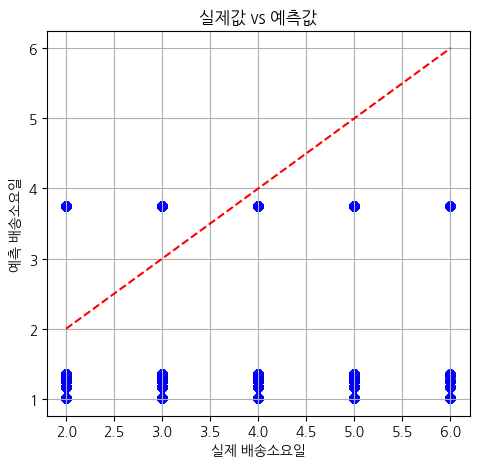

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# ÏÇ∞Ï†êÎèÑ: Ïã§Ï†ú vs ÏòàÏ∏°
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred, alpha=0.3, color='blue')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # y=x Í∏∞Ï§ÄÏÑ†
plt.xlabel('Ïã§Ï†ú Î∞∞ÏÜ°ÏÜåÏöîÏùº')
plt.ylabel('ÏòàÏ∏° Î∞∞ÏÜ°ÏÜåÏöîÏùº')
plt.title('Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í')
plt.grid(True)

C:\Users\hdemn\AppData\Local\Temp\ipykernel_176676\2308161214.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\hdemn\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


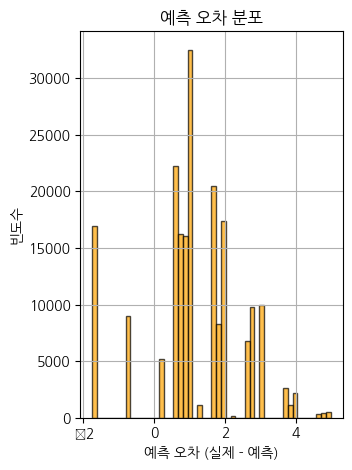

In [27]:
# Ïò§Ï∞® Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.subplot(1, 2, 2)
errors = y_true - y_pred
plt.hist(errors, bins=50, color='orange', edgecolor='k', alpha=0.7)
plt.xlabel('ÏòàÏ∏° Ïò§Ï∞® (Ïã§Ï†ú - ÏòàÏ∏°)')
plt.ylabel('ÎπàÎèÑÏàò')
plt.title('ÏòàÏ∏° Ïò§Ï∞® Î∂ÑÌè¨')
plt.grid(True)

plt.tight_layout()
plt.show()

C:\Users\hdemn\AppData\Local\Temp\ipykernel_176676\454072528.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


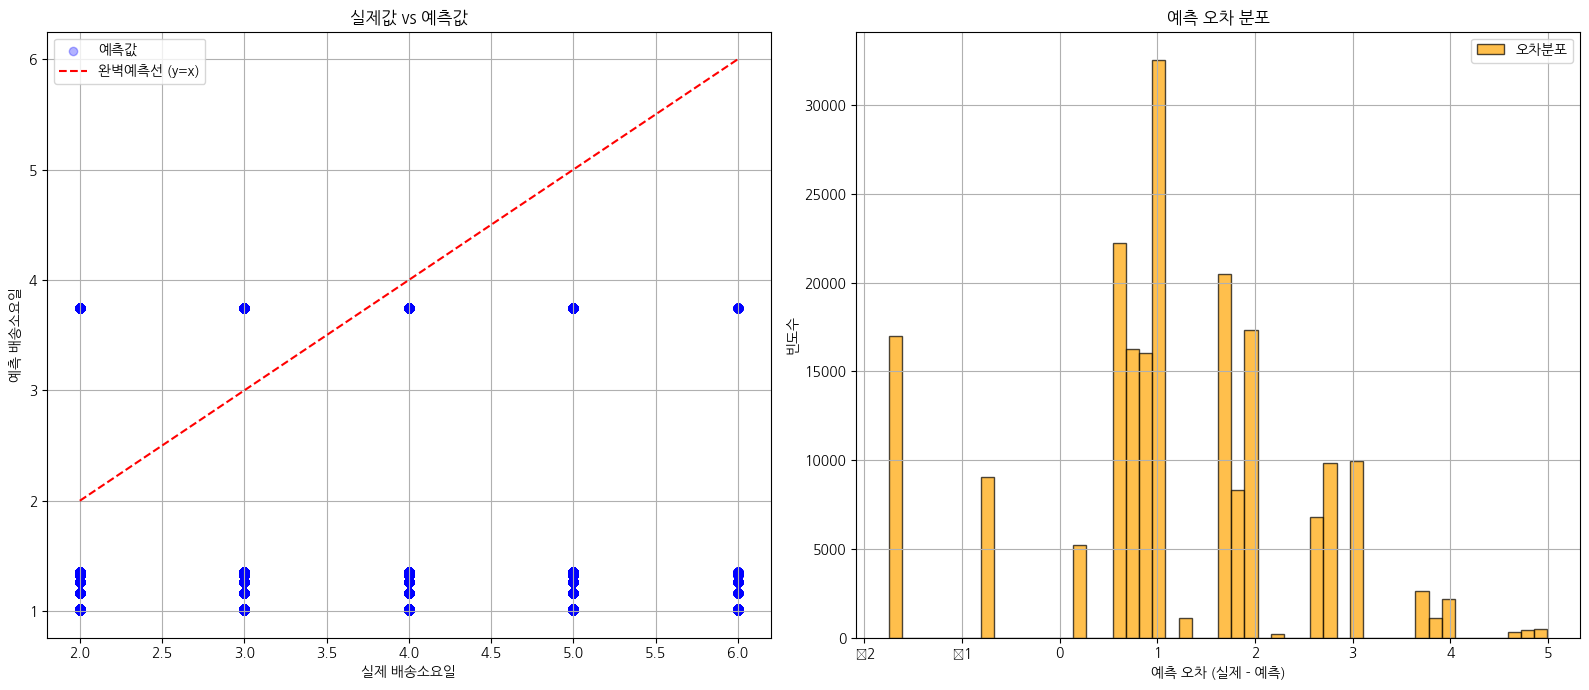

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16,7))

plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred, alpha=0.3, color='blue', label='ÏòàÏ∏°Í∞í')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='ÏôÑÎ≤ΩÏòàÏ∏°ÏÑ† (y=x)')
plt.xlabel('Ïã§Ï†ú Î∞∞ÏÜ°ÏÜåÏöîÏùº')
plt.ylabel('ÏòàÏ∏° Î∞∞ÏÜ°ÏÜåÏöîÏùº')
plt.title('Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
errors = y_true - y_pred
plt.hist(errors, bins=50, color='orange', edgecolor='k', alpha=0.7, label='Ïò§Ï∞®Î∂ÑÌè¨')
plt.xlabel('ÏòàÏ∏° Ïò§Ï∞® (Ïã§Ï†ú - ÏòàÏ∏°)')
plt.ylabel('ÎπàÎèÑÏàò')
plt.title('ÏòàÏ∏° Ïò§Ï∞® Î∂ÑÌè¨')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Ïù¥ÏÉÅÏπò ÌôïÏù∏
print(df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'].describe())

# Í∞í Ï†úÌïú ÌõÑ ÎÇ†Ïßú Í≥ÑÏÇ∞
df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº_clipped'] = df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'].clip(upper=60)
df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = df['Î∞∞ÏÜ°ÏãúÏûëÏùº'] + pd.to_timedelta(df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº_clipped'].round(), unit='D')

count    199582.000000
mean          1.592018
std           0.960118
min           1.009090
25%           1.017932
50%           1.261576
75%           1.352834
max           3.748754
Name: ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº, dtype: float64


In [14]:
print(df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'].isnull().sum())
print(np.isinf(df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº']).sum())

0
0


In [15]:
print(df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].dtype)
print(df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].head())

datetime64[ns]
0   2022-01-02
1   2022-01-02
2   2022-01-02
3   2022-01-02
4   2022-01-02
Name: Î∞∞ÏÜ°ÏãúÏûëÏùº, dtype: datetime64[ns]


In [16]:
print(df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].min())
print(df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].max())

2022-01-02 00:00:00
2023-08-09 00:00:00


In [17]:
print(len(df))
print(len(df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº']))
print(len(df['Î∞∞ÏÜ°ÏãúÏûëÏùº']))

199582
199582
199582


In [18]:
import numpy as np

print("ÏµúÎåÄÍ∞í:", df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'].max())
print("Ïù¥ÏÉÅÏπò Í∞úÏàò (10 Ïù¥ÏÉÅ):", (df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'] > 10).sum())
print("ÏùåÏàò Í∞úÏàò:", (df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'] < 0).sum())
print("inf Í∞úÏàò:", np.isinf(df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº']).sum())
print("NaN Í∞úÏàò:", df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'].isna().sum())

ÏµúÎåÄÍ∞í: 3.748753748766181
Ïù¥ÏÉÅÏπò Í∞úÏàò (10 Ïù¥ÏÉÅ): 0
ÏùåÏàò Í∞úÏàò: 0
inf Í∞úÏàò: 0
NaN Í∞úÏàò: 0


## ÏàòÎèô autoML + lightGBM ÏÇ¨Ïö©Ìïú Î≤ÑÏ†ÑÏúºÎ°ú ÏòàÏ∏°Í∏∞ ÎßåÎì§Í≥† ÏõêÎ≥∏ Î∞∞ÏÜ° Îç∞Ïù¥ÌÑ∞ Ï†ÅÏö©

In [1]:
import pandas as pd
merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')
merged_df

C:\Users\hdemn\AppData\Local\Temp\ipykernel_174828\1838646914.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv('merged_with_dates.csv', encoding='utf-8-sig')


DELIV_DATE  DELIV_PO_REGI_POCD        DISC_NO  DELIV_AREA_NO  \
0         2023-04-01               40086  6064895955535          43501   
1         2023-04-01               40086  6865289638668          43501   
2         2023-04-01               40086  6892037503973          43501   
3         2023-04-01               40086  6064889866430          43501   
4         2023-04-01               40086  6096359238210          43501   
...              ...                 ...            ...            ...   
48946395  2023-04-30               41627  6861500034808          43006   
48946396  2023-04-30               41627  7854151289393          43006   
48946397  2023-04-30               41627  7493702010161          43006   
48946398  2023-04-30               15181  6141202185453          43907   
48946399  2023-04-30               41627  7333501004797          43006   

          MAIL_KIND_SP_CD  MAIL_SP_CD  SPCL_TRT_CD DOM_EM_YN  \
0                       1           2          1.0         N   
1                       1           2          1.0         N   
2                       1           2          1.0         N   
3                       1           2          1.0         N   
4                       1           2          1.0         N   
...                   ...         ...          ...       ...   
48946395                1           2          1.0         N   
48946396                1           2          1.0         N   
48946397                1           2          1.0         N   
48946398                1           2          1.0         N   
48946399                1           2          1.0         N   

          RCV_PO_REGI_POCD VST_PRCL_YN  ... MAIL_WGHT MAIL_VOLM    RCV_DATE  \
0                  10248.0           Y  ...       NaN       NaN  2023-03-31   
1                  35656.0           Y  ...       NaN      50.0  2023-03-31   
2                  14559.0           N  ...       NaN      80.0  2023-03-31   
3                  10248.0           Y  ...       NaN       NaN  2023-03-31   
4                  40308.0           Y  ...       NaN      50.0  2023-03-31   
...                    ...         ...  ...       ...       ...         ...   
48946395           10186.0           Y  ...       NaN      50.0  2023-04-28   
48946396           41627.0           Y  ...       NaN      60.0  2023-04-21   
48946397           49374.0           N  ...       NaN      70.0  2023-04-28   
48946398           14120.0           N  ...       NaN      50.0  2023-04-28   
48946399           33358.0           N  ...       NaN      80.0  2023-04-28   

          SEMI_REGI_YN                BLD_MNGM_NO  DELIV_CTPV_NM  \
0                    N  4127310100105860000037211            Í≤ΩÍ∏∞ÎèÑ   
1                    N  4127310100105860000037209            Í≤ΩÍ∏∞ÎèÑ   
2                    N  4127310100105860000037210            Í≤ΩÍ∏∞ÎèÑ   
3                    N  4127310100105860000037210            Í≤ΩÍ∏∞ÎèÑ   
4                    N  4127310100105860000037213            Í≤ΩÍ∏∞ÎèÑ   
...                ...                        ...            ...   
48946395             N  4159025328102200001033788            Í≤ΩÍ∏∞ÎèÑ   
48946396             N  4122025624103400032000001            Í≤ΩÍ∏∞ÎèÑ   
48946397             N  4159025320200080001028607            Í≤ΩÍ∏∞ÎèÑ   
48946398             N  1130510100101340094019141          ÏÑúÏö∏ÌäπÎ≥ÑÏãú   
48946399             N  4159025324105050014028587            Í≤ΩÍ∏∞ÎèÑ   

         DELIV_CTGG_NM DELIV_ADSTRD_NM         EUPD_IVNM Î∞∞ÏÜ°ÏÜåÏöîÏùº  
0              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Ï§ëÍµ¨ Ïö¥ÏÑúÎèô     1  
1              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô  Ï∂©Ï≤≠ÎÇ®ÎèÑ Ï≤úÏïàÏãú ÎèôÎÇ®Íµ¨ Ï≤≠ÎãπÎèô     1  
2              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÏÑúÍµ¨ ÌôîÍ≥°1Îèô     1  
3              ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨             Í≥†ÏûîÎèô      Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Ï§ëÍµ¨ Ïö¥ÏÑúÎèô     1  
4              ÏïàÏÇ∞Ïãú Îã

In [2]:
merged_df['DELIV_DATE'] = pd.to_datetime(merged_df['DELIV_DATE'], errors='coerce')
merged_df['RCV_DATE'] = pd.to_datetime(merged_df['RCV_DATE'], errors='coerce')

# ‚úÖ ÌôïÏù∏
print(merged_df[['DELIV_DATE', 'RCV_DATE']].dtypes)

DELIV_DATE    datetime64[ns]
RCV_DATE      datetime64[ns]
dtype: object


In [1]:
import pandas as pd
df=pd.read_csv('Î∞∞ÏÜ°.csv', encoding='utf-8-sig')
df.info()

C:\Users\hdemn\AppData\Local\Temp\ipykernel_173404\2128619102.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Î∞∞ÏÜ°.csv', encoding='utf-8-sig')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199582 entries, 0 to 199581
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ï£ºÎ¨∏Î≤àÌò∏    199582 non-null  object 
 1   Î∞∞ÏÜ°ÏôÑÎ£åÏùº   199582 non-null  object 
 2   Î∞∞ÏÜ°ÏãúÏûëÏùº   199582 non-null  object 
 3   Íµ¨Îß§Ïùº     199582 non-null  object 
 4   Íµ¨Îß§ÏãúÏõîÎ†π   167839 non-null  float64
 5   Í≥†Í∞ùÎ≤àÌò∏    199582 non-null  float64
 6   Íµ¨Îß§Í∏àÏï°    199582 non-null  int64  
 7   Í≤∞Ï†úÍ∏àÏï°    199582 non-null  int64  
 8   Î¨ºÌíàÎåÄÎ∂ÑÎ•ò   199582 non-null  object 
 9   ÏÉÅÌíàÎ™Ö     199582 non-null  object 
 10  ÏÑ±Î≥Ñ      199582 non-null  object 
 11  Í≤∞ÌòºÏú†Î¨¥    199582 non-null  object 
 12  Í±∞Ï£ºÏßÄÏó≠    199582 non-null  object 
 13  Ïó∞Î†π      199582 non-null  int64  
 14  Í≤∞Ï†úÎì±Î°ùÏπ¥Îìú  199582 non-null  object 
 15  Ïú†ÏûÖÍ≤ΩÎ°ú    199582 non-null  object 
 16  ÏûêÎÖÄÏó¨Î∂Ä    199582 non-null  object 
 17  Ï∂úÏÇ∞ÏòàÏ†ï    199582 non

In [2]:
# ÎÇ†Ïßú Î≥ÄÌôò
df['Î∞∞ÏÜ°ÏãúÏûëÏùº'] = pd.to_datetime(df['Î∞∞ÏÜ°ÏãúÏûëÏùº'], errors='coerce')
df['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = pd.to_datetime(df['Î∞∞ÏÜ°ÏôÑÎ£åÏùº'], errors='coerce')

## Ïô∏Î∂ÄÎç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÎßåÎì§Í≥† Ï†ÄÏû•

In [5]:
print(merged_df[feature_cols].dtypes)

DELIV_CTPV_NM      object
DELIV_CTGG_NM      object
EUPD_IVNM          object
deliv_year          int32
deliv_month         int32
deliv_dayofweek     int32
dtype: object


In [4]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib  # Î™®Îç∏ Ï†ÄÏû•/Î∂àÎü¨Ïò§Í∏∞Ïö©

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (merged_df Í∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ï)
merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days
merged_df['deliv_year'] = merged_df['RCV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['RCV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['RCV_DATE'].dt.dayofweek

cat_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    merged_df[col] = merged_df[col].astype(str)
    merged_df[col] = le.fit_transform(merged_df[col])  # ‚Üê Ïó¨Í∏∞Í∞Ä ÌïµÏã¨
    label_encoders[col] = le
    joblib.dump(le, f'label_encoder_{col}.pkl')

feature_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', 'deliv_year', 'deliv_month', 'deliv_dayofweek']
X = merged_df[feature_cols]
y = merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'seed': 42
}

#model = lgb.train(params, train_data, valid_sets=[valid_data], early_stopping_rounds=50)

model = lgb.train(params, train_data, valid_sets=[valid_data])

# Î™®Îç∏ Ï†ÄÏû•
joblib.dump(model, 'lightgbm_delivery_model.pkl')
print("Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å")

Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å


In [13]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import joblib

# 1. Í∏∞Î≥∏ Ï†ÑÏ≤òÎ¶¨
merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days
merged_df['deliv_year'] = merged_df['RCV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['RCV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['RCV_DATE'].dt.dayofweek

# üîπ Ïó¨Í∏∞Ïóê ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä
merged_df['deliv_year'] += np.random.uniform(-0.5, 0.5, len(merged_df))
merged_df['deliv_month'] += np.random.uniform(-0.2, 0.2, len(merged_df))
merged_df['deliv_dayofweek'] += np.random.uniform(-0.2, 0.2, len(merged_df))

# 2. Î≤îÏ£ºÌòï Ïª¨ÎüºÏùÑ category ÌÉÄÏûÖÏúºÎ°ú ÏßÄÏ†ï (train/test split Ï†ÑÏóê!)
cat_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']
for col in cat_cols:
    merged_df[col] = merged_df[col].astype('category')

# 3. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
feature_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', 'deliv_year', 'deliv_month', 'deliv_dayofweek']
X = merged_df[feature_cols]
y = merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. LightGBM Dataset Í∞ùÏ≤¥ ÏÉùÏÑ±
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_cols)
valid_data = lgb.Dataset(X_valid, label=y_valid, categorical_feature=cat_cols)

# 5. Î™®Îç∏ ÌïôÏäµ
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'seed': 42
}

model = lgb.train(params, train_data, valid_sets=[valid_data])

# 6. Ï†ÄÏû•
joblib.dump(model, 'lightgbm_delivery_model.pkl')
print("‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å")

‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å


In [6]:
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨ (merged_df Í∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ï)
merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (merged_df['DELIV_DATE'] - merged_df['RCV_DATE']).dt.days
merged_df['deliv_year'] = merged_df['RCV_DATE'].dt.year
merged_df['deliv_month'] = merged_df['RCV_DATE'].dt.month
merged_df['deliv_dayofweek'] = merged_df['RCV_DATE'].dt.dayofweek

# ÎèôÏùºÌïú label encoding ÏàòÌñâ (Ï§ëÏöî!)
cat_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']
for col in cat_cols:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    # Ï£ºÏùò: Ïã§Ï†úÎ°úÎäî train Îïå Ïì¥ Ïù∏ÏΩîÎçî Ï†ÄÏû• ÌõÑ Ïû¨ÏÇ¨Ïö©Ìï¥Ïïº Ìï®

feature_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM', 'deliv_year', 'deliv_month', 'deliv_dayofweek']

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = joblib.load('lightgbm_delivery_model.pkl')

# ÏòàÏ∏°
merged_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = model.predict(merged_df[feature_cols], num_iteration=model.best_iteration)
merged_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = merged_df['RCV_DATE'] + pd.to_timedelta(merged_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'].round(), unit='D')

# ÏÑ±Îä• ÌèâÍ∞Ä
y_true = merged_df['Î∞∞ÏÜ°ÏÜåÏöîÏùº']
y_pred = merged_df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº']
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

# Í≤∞Í≥º ÏùºÎ∂Ä Ï∂úÎ†•
print(merged_df[['RCV_DATE','ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº', 'ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].head())

MAE: 1.0777442768882373
RMSE: 1.7833690261765462
    RCV_DATE  ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº   ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº
0 2023-03-31  1.907007 2023-04-02
1 2023-03-31  2.617619 2023-04-03
2 2023-03-31  3.311753 2023-04-03
3 2023-03-31  1.907007 2023-04-02
4 2023-03-31  2.413816 2023-04-02


## Ï†ÄÏû•Ìïú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄ Î∞∞ÏÜ°Îç∞Ïù¥ÌÑ∞Î•º ÎÑ£Í≥† Í≤∞Í≥º ÏòàÏ∏°Í∞íÏùÑ ÌôïÏù∏

In [15]:
import pandas as pd
import numpy as np
import joblib

df = pd.read_csv('Î∞∞ÏÜ°.csv', encoding='utf-8-sig')

# ÎÇ†Ïßú Ï≤òÎ¶¨
df['Î∞∞ÏÜ°ÏãúÏûëÏùº'] = pd.to_datetime(df['Î∞∞ÏÜ°ÏãúÏûëÏùº'])
df['deliv_year'] = df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].dt.year
df['deliv_month'] = df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].dt.month
df['deliv_dayofweek'] = df['Î∞∞ÏÜ°ÏãúÏûëÏùº'].dt.dayofweek

# ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä
df['deliv_year'] = df['deliv_year'] + np.random.uniform(-0.5, 0.5, len(df))
df['deliv_month'] = df['deliv_month'] + np.random.uniform(-0.2, 0.2, len(df))
df['deliv_dayofweek'] = df['deliv_dayofweek'] + np.random.uniform(-0.2, 0.2, len(df))

# Ï∂úÎ∞úÏßÄ/ÎèÑÏ∞©ÏßÄ
df['DELIV_CTPV_NM'] = 'Í≤ΩÍ∏∞ÎèÑ'
df['DELIV_CTGG_NM'] = 'ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨'
df['EUPD_IVNM'] = df['Í±∞Ï£ºÏßÄÏó≠']

# Î≤îÏ£ºÌòï ÌÉÄÏûÖ ÏßÄÏ†ï
cat_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM']
for col in cat_cols:
    df[col] = df[col].astype('category')

# ÏòàÏ∏°
feature_cols = ['DELIV_CTPV_NM', 'DELIV_CTGG_NM', 'EUPD_IVNM',
                'deliv_year', 'deliv_month', 'deliv_dayofweek']
model = joblib.load('lightgbm_delivery_model.pkl')
df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = model.predict(df[feature_cols])
df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº'] = df['Î∞∞ÏÜ°ÏãúÏûëÏùº'] + pd.to_timedelta(df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'].round(), unit='D')

C:\Users\hdemn\AppData\Local\Temp\ipykernel_174828\1236875605.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Î∞∞ÏÜ°.csv', encoding='utf-8-sig')


In [16]:
# 9. Í≤∞Í≥º ÌôïÏù∏
print(df[['Î∞∞ÏÜ°ÏãúÏûëÏùº', 'Í±∞Ï£ºÏßÄÏó≠', 'ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº', 'ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº']].head())

       Î∞∞ÏÜ°ÏãúÏûëÏùº Í±∞Ï£ºÏßÄÏó≠  ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº   ÏòàÏÉÅ_Î∞∞ÏÜ°ÏôÑÎ£åÏùº
0 2022-01-02   ÏÑúÏö∏   4.91377 2022-01-07
1 2022-01-02  Ï∂©Ï≤≠ÎèÑ   4.91377 2022-01-07
2 2022-01-02   ÏÑúÏö∏   4.91377 2022-01-07
3 2022-01-02   ÏÑúÏö∏   4.91377 2022-01-07
4 2022-01-02   Í∞ïÏõê   4.91377 2022-01-07


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ïã§Ï†ú Î∞∞ÏÜ° ÏôÑÎ£åÏùº Ïª¨ÎüºÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï
# Ïã§Ï†ú Î∞∞ÏÜ°ÏÜåÏöîÏùº Í≥ÑÏÇ∞
df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'] = (pd.to_datetime(df['Î∞∞ÏÜ°ÏôÑÎ£åÏùº']) - df['Î∞∞ÏÜ°ÏãúÏûëÏùº']).dt.days

# MAE Í≥ÑÏÇ∞
mae = mean_absolute_error(df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'], df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº'])

# RMSE Í≥ÑÏÇ∞
rmse = np.sqrt(mean_squared_error(df['Î∞∞ÏÜ°ÏÜåÏöîÏùº'], df['ÏòàÏÉÅ_Î∞∞ÏÜ°ÏÜåÏöîÏùº']))

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

MAE: 40.503
RMSE: 54.175


In [16]:
le_ctpv = joblib.load('label_encoder_DELIV_CTPV_NM.pkl')
print("LabelEncoder ÌÅ¥ÎûòÏä§ Î™©Î°ù:", le_ctpv.classes_)
print("DELIV_CTPV_NM ÏòàÏãúÍ∞í:", df['DELIV_CTPV_NM'].unique())

LabelEncoder ÌÅ¥ÎûòÏä§ Î™©Î°ù: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
DELIV_CTPV_NM ÏòàÏãúÍ∞í: ['ÏÑúÏö∏ÌäπÎ≥ÑÏãú']


In [5]:
print(merged_df['DELIV_CTPV_NM'])

0             Í≤ΩÍ∏∞ÎèÑ
1             Í≤ΩÍ∏∞ÎèÑ
2             Í≤ΩÍ∏∞ÎèÑ
3             Í≤ΩÍ∏∞ÎèÑ
4             Í≤ΩÍ∏∞ÎèÑ
            ...  
48946395      Í≤ΩÍ∏∞ÎèÑ
48946396      Í≤ΩÍ∏∞ÎèÑ
48946397      Í≤ΩÍ∏∞ÎèÑ
48946398    ÏÑúÏö∏ÌäπÎ≥ÑÏãú
48946399      Í≤ΩÍ∏∞ÎèÑ
Name: DELIV_CTPV_NM, Length: 48946400, dtype: object


In [6]:
print(merged_df['DELIV_CTGG_NM'])

0           ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨
1           ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨
2           ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨
3           ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨
4           ÏïàÏÇ∞Ïãú Îã®ÏõêÍµ¨
             ...   
48946395        ÌôîÏÑ±Ïãú
48946396        ÌèâÌÉùÏãú
48946397        ÌôîÏÑ±Ïãú
48946398        Í∞ïÎ∂ÅÍµ¨
48946399        ÌôîÏÑ±Ïãú
Name: DELIV_CTGG_NM, Length: 48946400, dtype: object


In [8]:
print(merged_df['DELIV_CTPV_NM'].unique())

['Í≤ΩÍ∏∞ÎèÑ' 'ÏÑúÏö∏ÌäπÎ≥ÑÏãú' 'Ï†úÏ£ºÌäπÎ≥ÑÏûêÏπòÎèÑ' 'ÎåÄÍµ¨Í¥ëÏó≠Ïãú' 'Ï∂©Ï≤≠ÎÇ®ÎèÑ' 'Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú' 'Ï∂©Ï≤≠Î∂ÅÎèÑ' 'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú' 'Í≤ΩÏÉÅÎÇ®ÎèÑ'
 'ÏÑ∏Ï¢ÖÌäπÎ≥ÑÏûêÏπòÏãú' 'Í≤ΩÏÉÅÎ∂ÅÎèÑ' 'Ï†ÑÎùºÎ∂ÅÎèÑ' 'ÎåÄÏ†ÑÍ¥ëÏó≠Ïãú' 'Í¥ëÏ£ºÍ¥ëÏó≠Ïãú' 'Î∂ÄÏÇ∞Í¥ëÏó≠Ïãú' 'Ï†ÑÎùºÎÇ®ÎèÑ' 'Í∞ïÏõêÎèÑ']
